# Setup
This Jupyter Notebook is meant to be executed directly from Google Colab in a plug and play manner.
To enable this, the following code below can be run to set up the notebook

In [ ]:
import os
import sys

!git clone -b mfcc https://github.com/terryluan12/Genrify.git
!cd Genrify && make

sys.path.insert(0, "Genrify/src")

## Preprocessing Code
The following code can be run to download the datasets and preprocess the datasets

In [1]:
from datasources import download_datasets
from preprocessing import preprocess

c:\Users\Jack\.conda\envs\aps360\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
# Make sure to change subset_num to the subset which you are using
subset_num = 3
method = "mfcc"
root_dir = "."
import os
if not os.path.isdir(os.path.join(root_dir, "datasources", "processed_data")):
    os.makedirs(os.path.join(root_dir, "datasources"), exist_ok=True)
    download_datasets(root_dir)

preprocess(subset_num, method, root_dir)

Splitting processed Data into 4 exclusive datasets.
Converting to MFCC


In [2]:
from cnn import mfcc_model, training
from utils import plot
from cnn.datahandler.DataHandler import DataHandler
import os
import torch

## Example to training an model

In [ ]:
mfcc_data_dir = os.path.join(root_dir, "datasources", "mfcc")
mfcc_data_handler = DataHandler(mfcc_data_dir, batch_size=32, num_workers=4)
for ss, g in [(10, 1.0), (10, 0.8)]:
    for lr in [5e-5, 1e-4, 2e-4, 3e-4, 5e-4]:
        num_epochs = 60
        mfcc_cnn = mfcc_model.MFCC_CNN()
        print(f"Learning rate: {lr}, Subset size: {ss}, Gamma: {g}")
        best_epoch = training.train(mfcc_cnn, mfcc_data_handler.train_loader, mfcc_data_handler.val_loader, num_epochs, lr, 32, ss, g)
        model_path = training.get_model_name(mfcc_cnn.name, 32, lr, best_epoch)
        %matplotlib inline
        plot.plot_training_curve(model_path)
        plot.plot_confusion_matrix(model_path, range(10))
        # test the model
        test_data = mfcc_data_handler.test_loader
        mfcc_cnn.load_state_dict(torch.load(f"./models/{model_path}.pt"))
        training.test_model(mfcc_cnn, test_data)

Learning rate: 5e-05, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 2.3523, Train Accuracy: 25.26%, Val Loss: 1.9987, Val Accuracy: 32.35%
Epoch [2/60], Train Loss: 1.6997, Train Accuracy: 37.63%, Val Loss: 1.6497, Val Accuracy: 37.17%
Epoch [3/60], Train Loss: 1.4967, Train Accuracy: 45.30%, Val Loss: 1.5762, Val Accuracy: 40.11%
Epoch [4/60], Train Loss: 1.4068, Train Accuracy: 49.66%, Val Loss: 1.4879, Val Accuracy: 46.26%
Epoch [5/60], Train Loss: 1.3395, Train Accuracy: 50.17%, Val Loss: 1.5146, Val Accuracy: 44.92%
Epoch [6/60], Train Loss: 1.2271, Train Accuracy: 55.78%, Val Loss: 1.3871, Val Accuracy: 49.73%
Epoch [7/60], Train Loss: 1.1089, Train Accuracy: 59.05%, Val Loss: 1.4524, Val Accuracy: 47.06%
Epoch [8/60], Train Loss: 1.0222, Train Accuracy: 63.46%, Val Loss: 1.3269, Val Accuracy: 49.73%
Epoch [9/60], Train Loss: 0.8892, Train Accuracy: 68.50%, Val Loss: 1.3169, Val Accuracy: 56.42%
Epoch [10/60], Train Loss: 0.8201, Train Accuracy: 69.93%, Val Loss: 1.3109, 

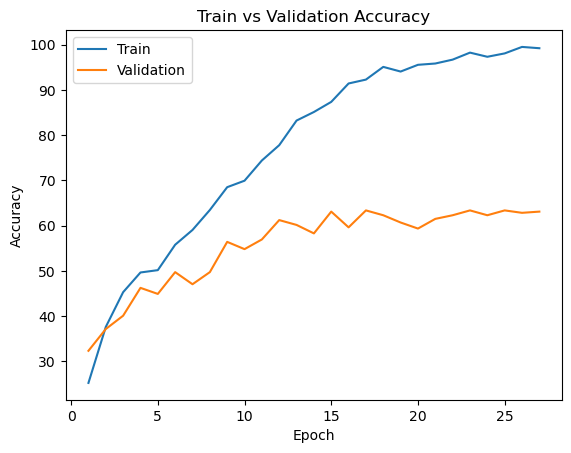

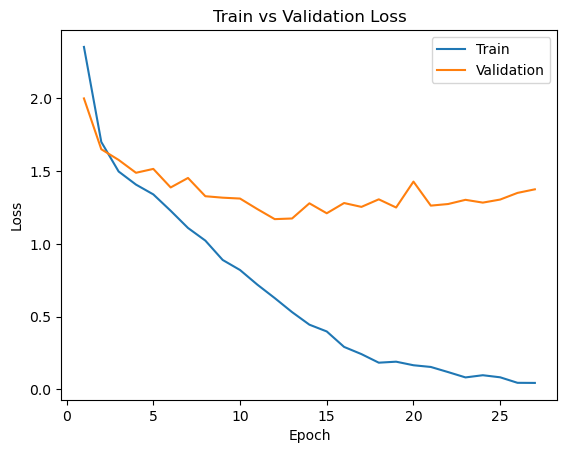

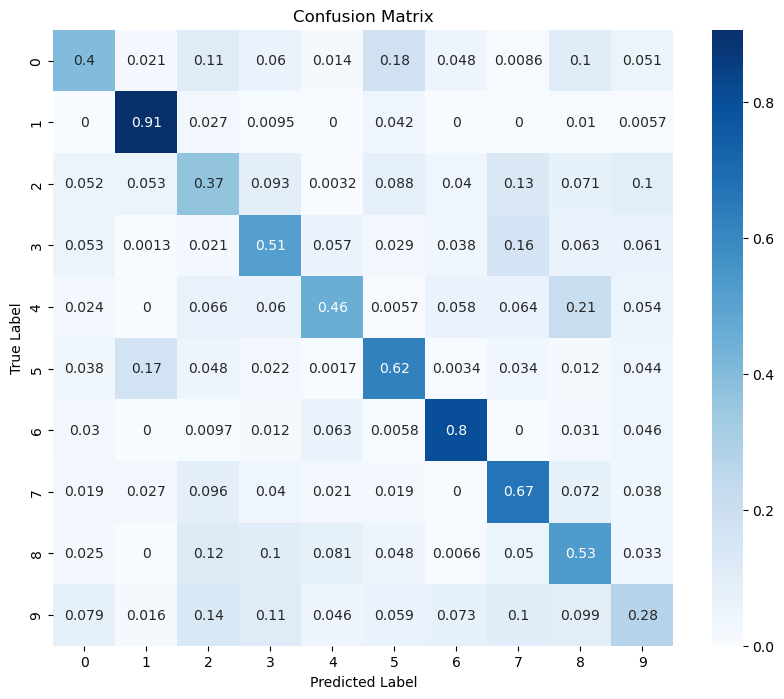

Test Accuracy: 61.33%
Learning rate: 0.0001, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 2.8893, Train Accuracy: 25.77%, Val Loss: 1.8718, Val Accuracy: 30.75%
Epoch [2/60], Train Loss: 1.6944, Train Accuracy: 35.91%, Val Loss: 1.6877, Val Accuracy: 36.36%
Epoch [3/60], Train Loss: 1.5703, Train Accuracy: 43.30%, Val Loss: 1.5947, Val Accuracy: 39.57%
Epoch [4/60], Train Loss: 1.4911, Train Accuracy: 45.65%, Val Loss: 1.5813, Val Accuracy: 41.18%
Epoch [5/60], Train Loss: 1.4120, Train Accuracy: 47.65%, Val Loss: 1.5588, Val Accuracy: 41.18%
Epoch [6/60], Train Loss: 1.3494, Train Accuracy: 50.23%, Val Loss: 1.4406, Val Accuracy: 49.47%
Epoch [7/60], Train Loss: 1.2412, Train Accuracy: 55.27%, Val Loss: 1.4897, Val Accuracy: 44.12%
Epoch [8/60], Train Loss: 1.1444, Train Accuracy: 58.93%, Val Loss: 1.3285, Val Accuracy: 51.34%
Epoch [9/60], Train Loss: 1.0479, Train Accuracy: 62.94%, Val Loss: 1.2627, Val Accuracy: 55.61%
Epoch [10/60], Train Loss: 0.9091, Train Accuracy: 67.

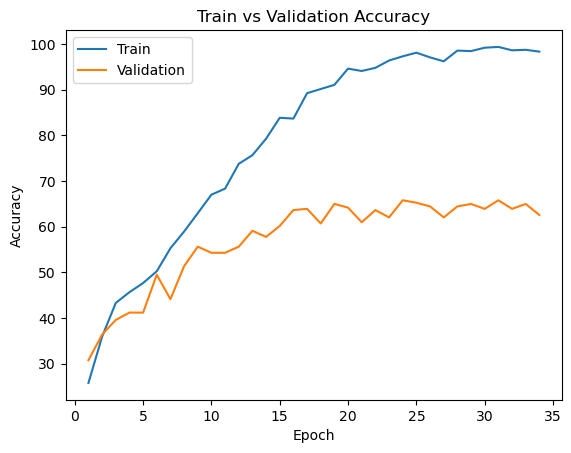

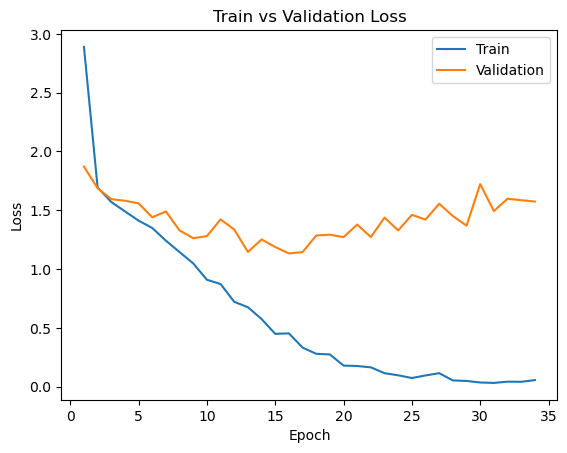

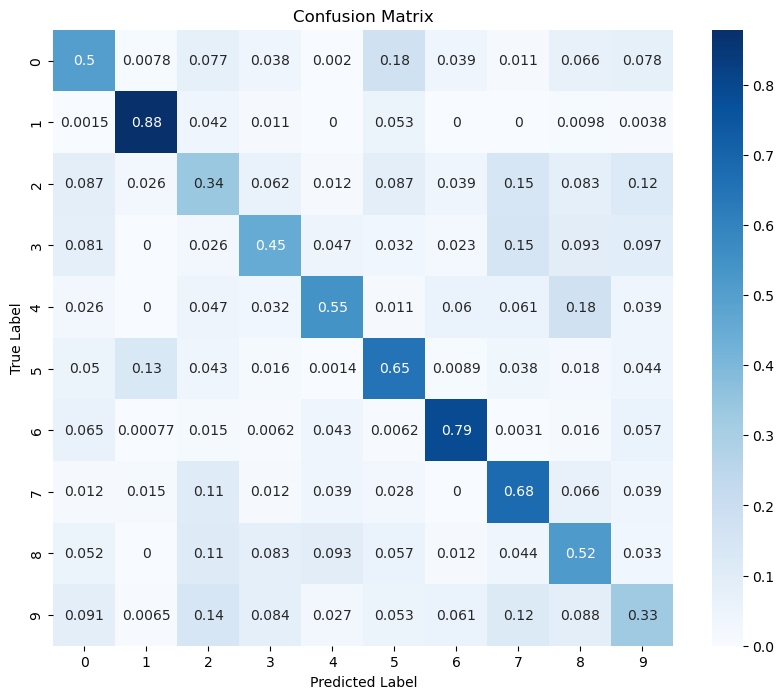

Test Accuracy: 64.53%
Learning rate: 0.0002, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 3.8105, Train Accuracy: 18.04%, Val Loss: 2.2190, Val Accuracy: 19.25%
Epoch [2/60], Train Loss: 1.8781, Train Accuracy: 30.64%, Val Loss: 1.8971, Val Accuracy: 32.35%
Epoch [3/60], Train Loss: 1.6516, Train Accuracy: 38.26%, Val Loss: 1.6583, Val Accuracy: 39.57%
Epoch [4/60], Train Loss: 1.5701, Train Accuracy: 41.92%, Val Loss: 1.6274, Val Accuracy: 40.64%
Epoch [5/60], Train Loss: 1.5304, Train Accuracy: 43.07%, Val Loss: 1.6297, Val Accuracy: 39.30%
Epoch [6/60], Train Loss: 1.4725, Train Accuracy: 47.25%, Val Loss: 1.5204, Val Accuracy: 41.44%
Epoch [7/60], Train Loss: 1.3887, Train Accuracy: 48.11%, Val Loss: 1.5023, Val Accuracy: 46.26%
Epoch [8/60], Train Loss: 1.3392, Train Accuracy: 51.37%, Val Loss: 1.3988, Val Accuracy: 46.79%
Epoch [9/60], Train Loss: 1.2134, Train Accuracy: 55.61%, Val Loss: 1.3767, Val Accuracy: 48.93%
Epoch [10/60], Train Loss: 1.1439, Train Accuracy: 57.

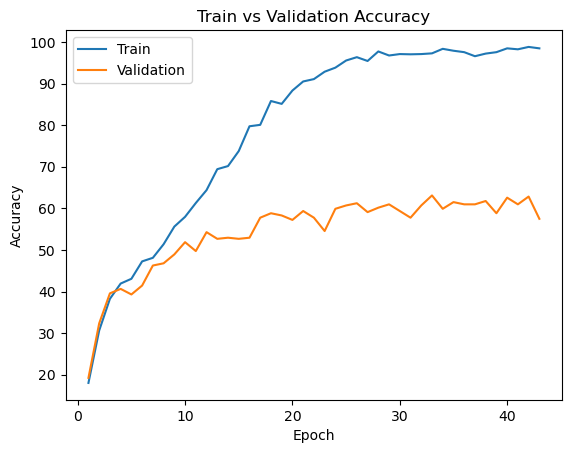

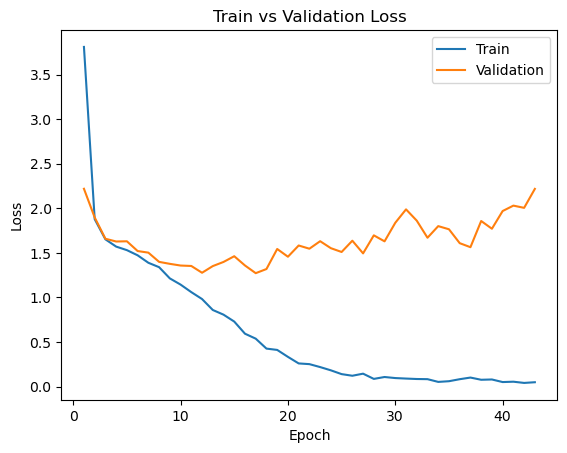

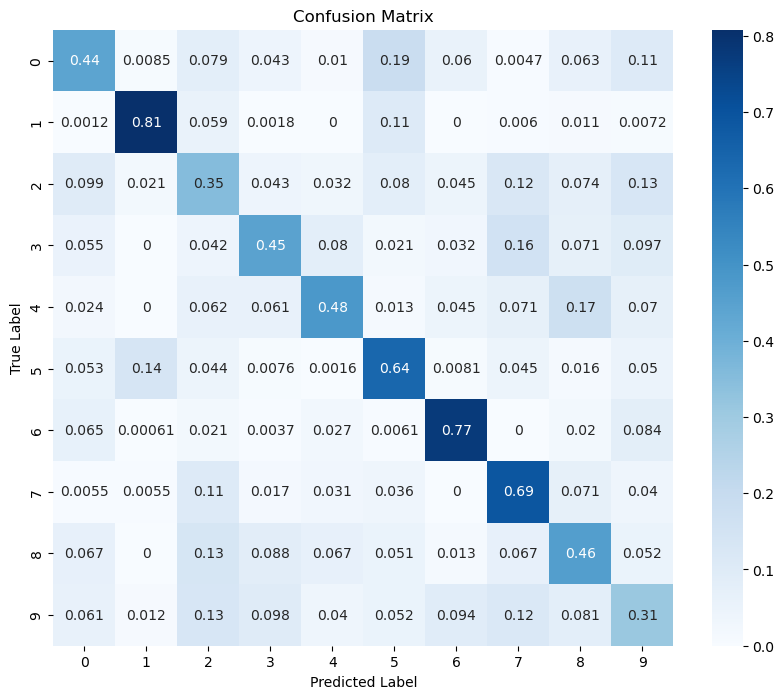

Test Accuracy: 62.67%
Learning rate: 0.0003, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 4.6738, Train Accuracy: 15.52%, Val Loss: 2.1481, Val Accuracy: 20.59%
Epoch [2/60], Train Loss: 2.0160, Train Accuracy: 27.26%, Val Loss: 1.9299, Val Accuracy: 26.20%
Epoch [3/60], Train Loss: 1.7395, Train Accuracy: 36.94%, Val Loss: 1.6802, Val Accuracy: 36.36%
Epoch [4/60], Train Loss: 1.6507, Train Accuracy: 40.55%, Val Loss: 1.6978, Val Accuracy: 37.17%
Epoch [5/60], Train Loss: 1.6090, Train Accuracy: 42.21%, Val Loss: 1.6765, Val Accuracy: 38.50%
Epoch [6/60], Train Loss: 1.5656, Train Accuracy: 43.53%, Val Loss: 1.5910, Val Accuracy: 40.37%
Epoch [7/60], Train Loss: 1.5079, Train Accuracy: 43.53%, Val Loss: 1.5343, Val Accuracy: 43.05%
Epoch [8/60], Train Loss: 1.4248, Train Accuracy: 46.11%, Val Loss: 1.5906, Val Accuracy: 38.77%
Epoch [9/60], Train Loss: 1.3868, Train Accuracy: 48.57%, Val Loss: 1.5906, Val Accuracy: 43.05%
Epoch [10/60], Train Loss: 1.3134, Train Accuracy: 52.

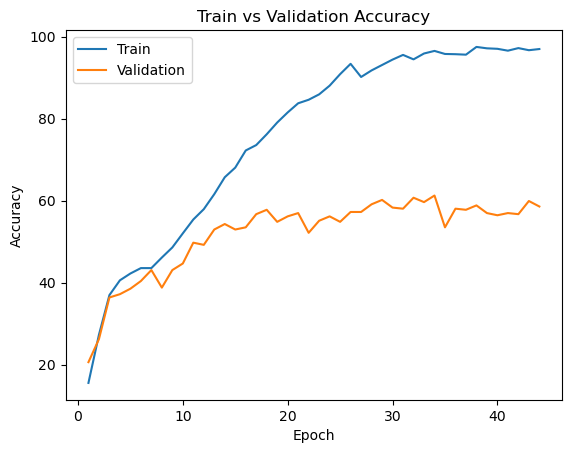

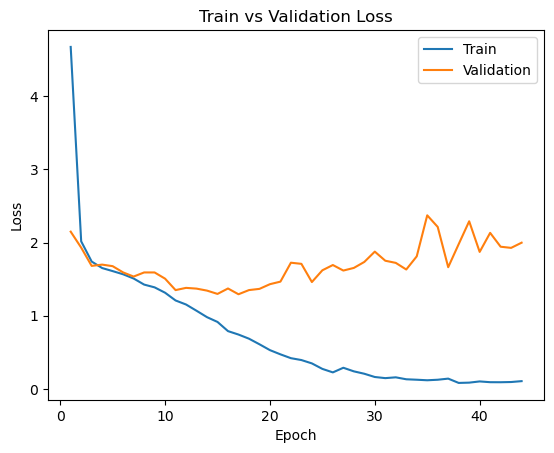

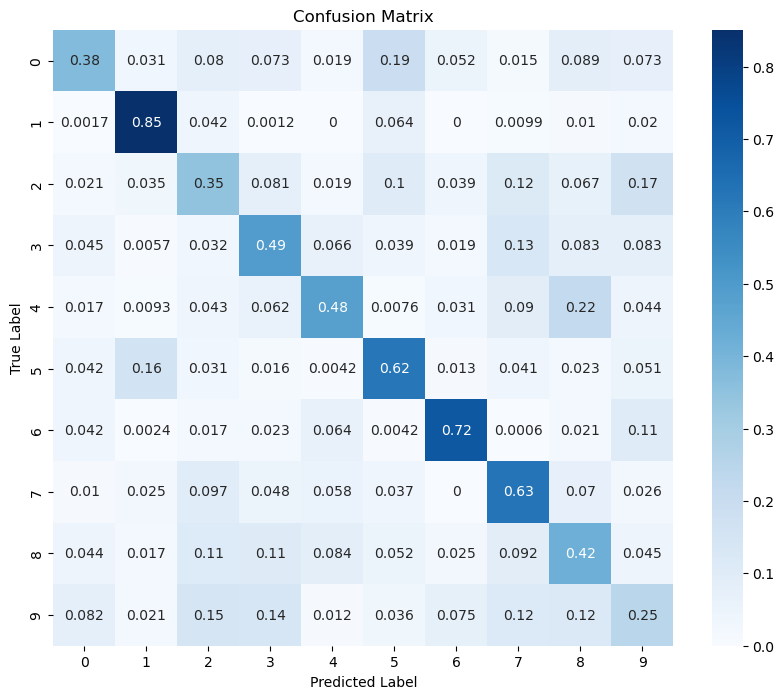

Test Accuracy: 59.47%
Learning rate: 0.0005, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 5.2478, Train Accuracy: 13.97%, Val Loss: 2.2527, Val Accuracy: 14.71%
Epoch [2/60], Train Loss: 2.2035, Train Accuracy: 18.73%, Val Loss: 2.1684, Val Accuracy: 18.72%
Epoch [3/60], Train Loss: 2.0878, Train Accuracy: 24.05%, Val Loss: 2.0295, Val Accuracy: 29.14%
Epoch [4/60], Train Loss: 1.8589, Train Accuracy: 31.39%, Val Loss: 1.7727, Val Accuracy: 31.28%
Epoch [5/60], Train Loss: 1.7233, Train Accuracy: 35.34%, Val Loss: 1.7378, Val Accuracy: 35.56%
Epoch [6/60], Train Loss: 1.6306, Train Accuracy: 37.92%, Val Loss: 1.6103, Val Accuracy: 35.56%
Epoch [7/60], Train Loss: 1.5818, Train Accuracy: 41.29%, Val Loss: 1.6147, Val Accuracy: 38.24%
Epoch [8/60], Train Loss: 1.5509, Train Accuracy: 42.10%, Val Loss: 1.5760, Val Accuracy: 37.97%
Epoch [9/60], Train Loss: 1.4692, Train Accuracy: 45.93%, Val Loss: 1.5212, Val Accuracy: 44.39%
Epoch [10/60], Train Loss: 1.4548, Train Accuracy: 46.

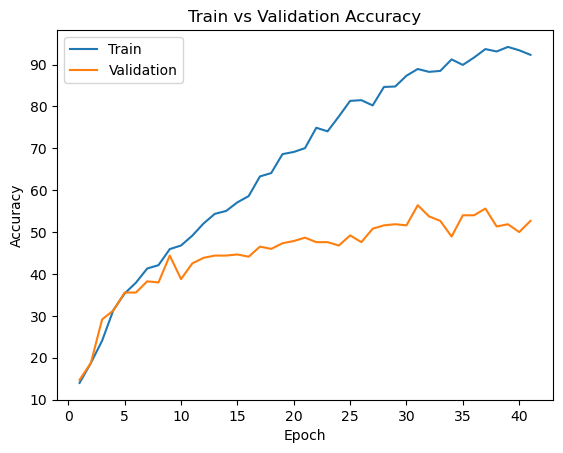

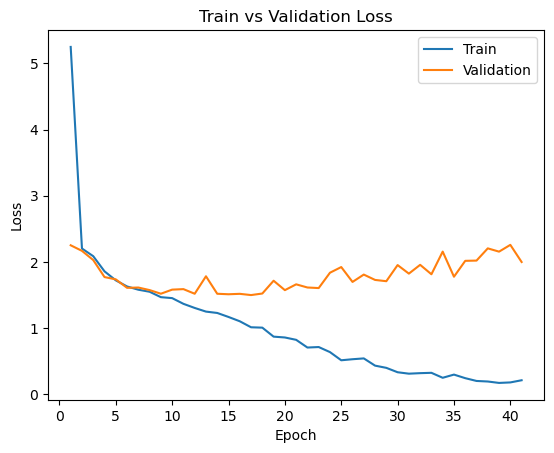

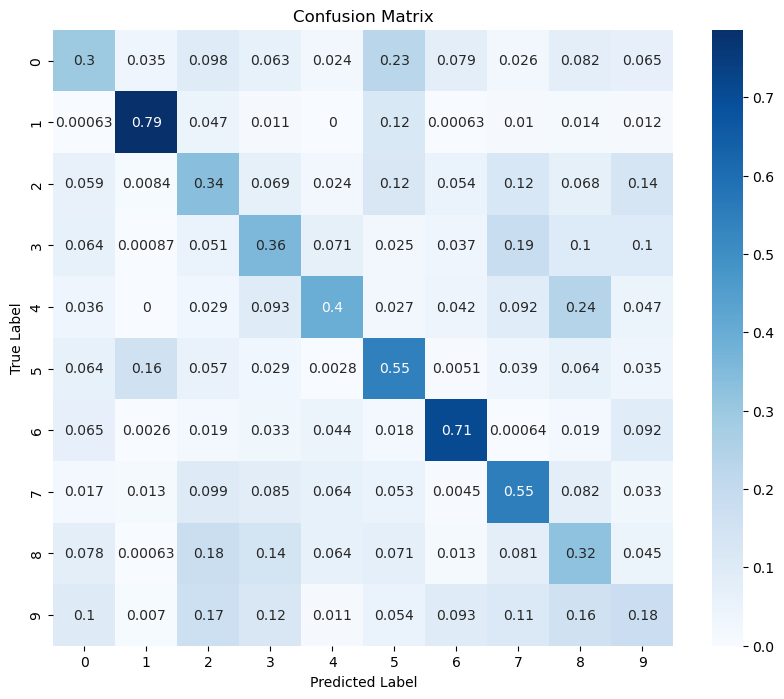

Test Accuracy: 53.60%
Learning rate: 5e-05, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 2.4204, Train Accuracy: 25.43%, Val Loss: 1.7869, Val Accuracy: 35.03%
Epoch [2/60], Train Loss: 1.6417, Train Accuracy: 38.49%, Val Loss: 1.6718, Val Accuracy: 36.63%
Epoch [3/60], Train Loss: 1.4867, Train Accuracy: 45.25%, Val Loss: 1.5179, Val Accuracy: 44.12%
Epoch [4/60], Train Loss: 1.4032, Train Accuracy: 49.66%, Val Loss: 1.4715, Val Accuracy: 43.58%
Epoch [5/60], Train Loss: 1.2715, Train Accuracy: 53.38%, Val Loss: 1.4469, Val Accuracy: 48.40%
Epoch [6/60], Train Loss: 1.2173, Train Accuracy: 56.93%, Val Loss: 1.3720, Val Accuracy: 51.60%
Epoch [7/60], Train Loss: 1.0684, Train Accuracy: 62.83%, Val Loss: 1.3069, Val Accuracy: 52.94%
Epoch [8/60], Train Loss: 1.0441, Train Accuracy: 62.94%, Val Loss: 1.3529, Val Accuracy: 54.55%
Epoch [9/60], Train Loss: 0.9025, Train Accuracy: 69.07%, Val Loss: 1.3395, Val Accuracy: 53.48%
Epoch [10/60], Train Loss: 0.7521, Train Accuracy: 74.3

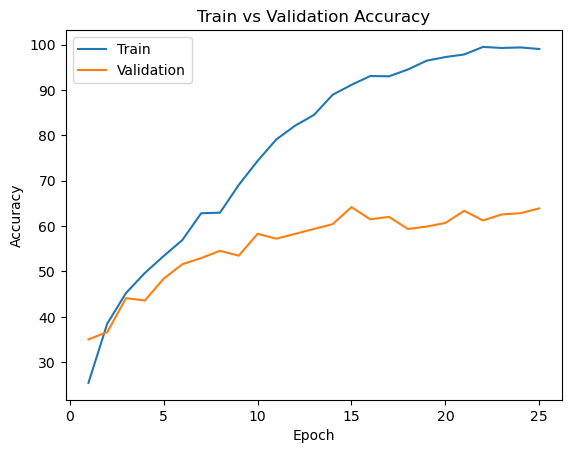

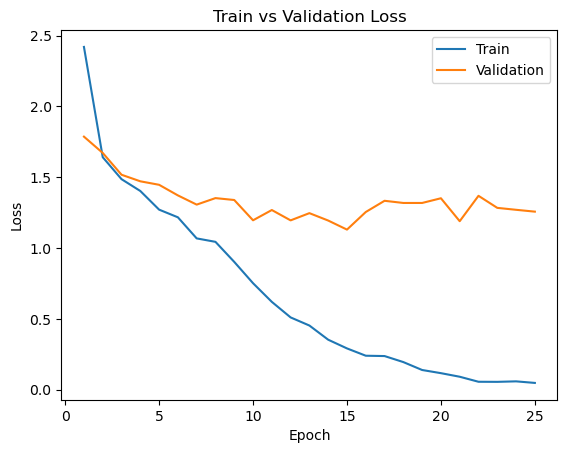

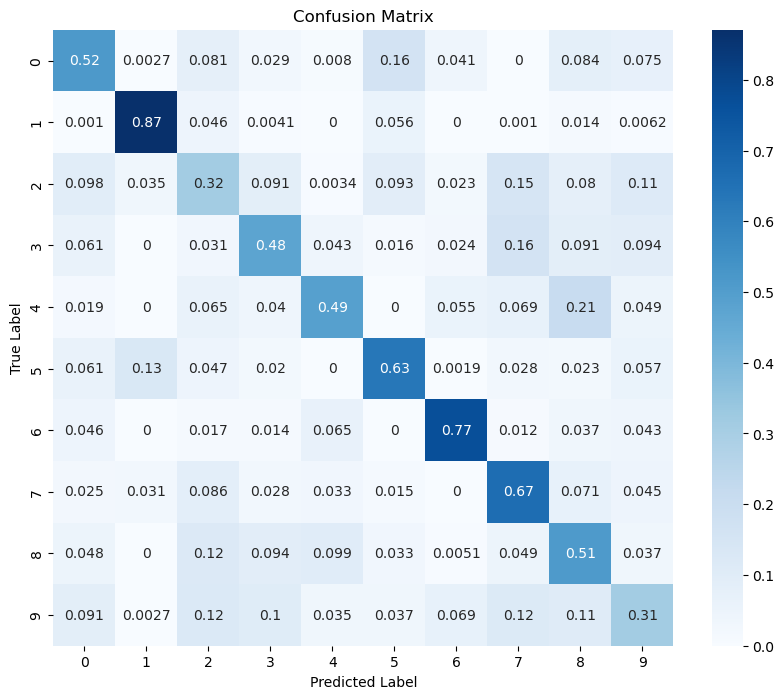

Test Accuracy: 62.40%
Learning rate: 0.0001, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 2.8675, Train Accuracy: 21.08%, Val Loss: 1.8506, Val Accuracy: 33.69%
Epoch [2/60], Train Loss: 1.7101, Train Accuracy: 37.57%, Val Loss: 1.7126, Val Accuracy: 34.76%
Epoch [3/60], Train Loss: 1.5824, Train Accuracy: 41.35%, Val Loss: 1.5759, Val Accuracy: 41.98%
Epoch [4/60], Train Loss: 1.5239, Train Accuracy: 44.90%, Val Loss: 1.7238, Val Accuracy: 36.10%
Epoch [5/60], Train Loss: 1.4553, Train Accuracy: 46.51%, Val Loss: 1.5305, Val Accuracy: 37.70%
Epoch [6/60], Train Loss: 1.3780, Train Accuracy: 49.48%, Val Loss: 1.6002, Val Accuracy: 44.39%
Epoch [7/60], Train Loss: 1.2554, Train Accuracy: 54.81%, Val Loss: 1.4323, Val Accuracy: 48.13%
Epoch [8/60], Train Loss: 1.1931, Train Accuracy: 56.07%, Val Loss: 1.3948, Val Accuracy: 49.73%
Epoch [9/60], Train Loss: 1.1063, Train Accuracy: 58.82%, Val Loss: 1.3400, Val Accuracy: 50.53%
Epoch [10/60], Train Loss: 0.9773, Train Accuracy: 65.

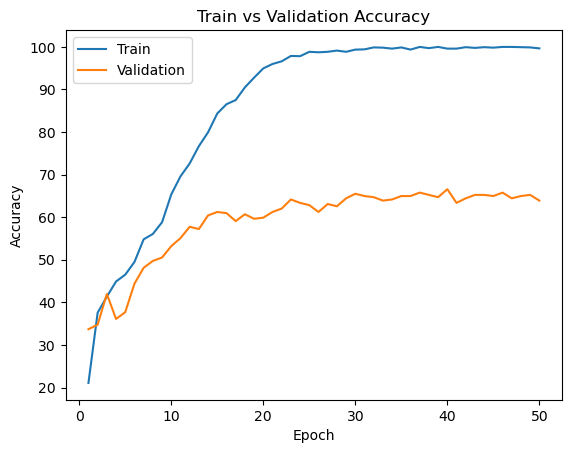

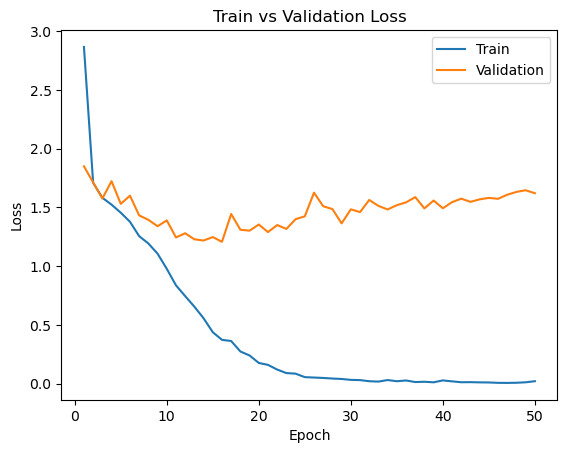

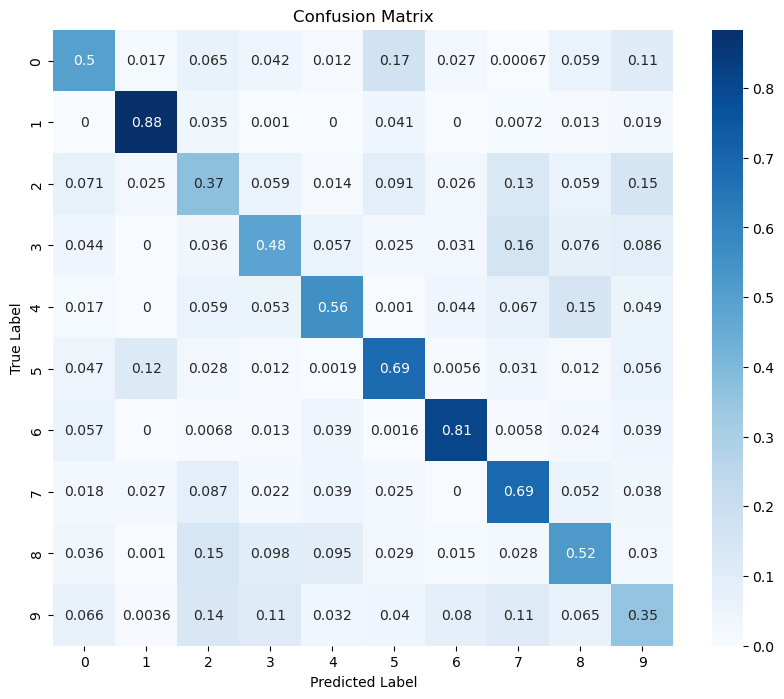

Test Accuracy: 65.07%
Learning rate: 0.0002, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 3.3910, Train Accuracy: 19.70%, Val Loss: 2.1726, Val Accuracy: 21.12%
Epoch [2/60], Train Loss: 1.8992, Train Accuracy: 30.01%, Val Loss: 1.7873, Val Accuracy: 33.16%
Epoch [3/60], Train Loss: 1.6383, Train Accuracy: 38.89%, Val Loss: 1.6981, Val Accuracy: 34.22%
Epoch [4/60], Train Loss: 1.6061, Train Accuracy: 40.32%, Val Loss: 1.6949, Val Accuracy: 38.24%
Epoch [5/60], Train Loss: 1.5331, Train Accuracy: 44.50%, Val Loss: 1.5553, Val Accuracy: 41.71%
Epoch [6/60], Train Loss: 1.4290, Train Accuracy: 46.62%, Val Loss: 1.4990, Val Accuracy: 43.05%
Epoch [7/60], Train Loss: 1.3927, Train Accuracy: 48.11%, Val Loss: 1.5492, Val Accuracy: 44.65%
Epoch [8/60], Train Loss: 1.3117, Train Accuracy: 52.35%, Val Loss: 1.4508, Val Accuracy: 45.45%
Epoch [9/60], Train Loss: 1.2430, Train Accuracy: 54.52%, Val Loss: 1.3630, Val Accuracy: 50.80%
Epoch [10/60], Train Loss: 1.1179, Train Accuracy: 59.

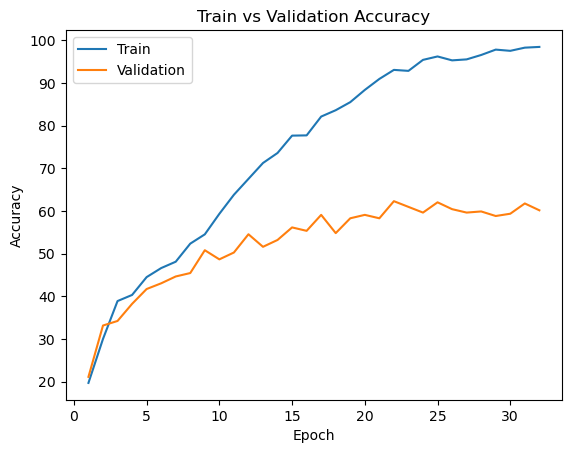

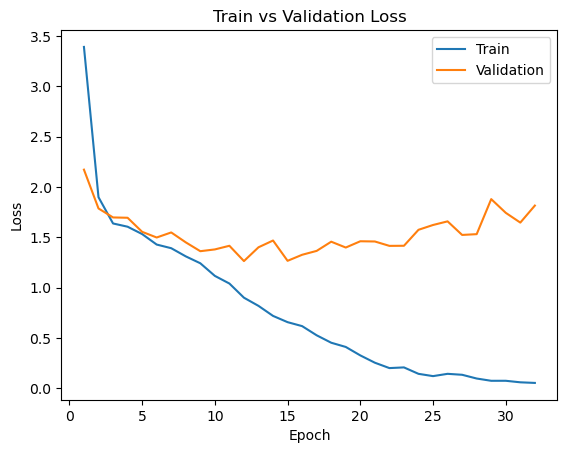

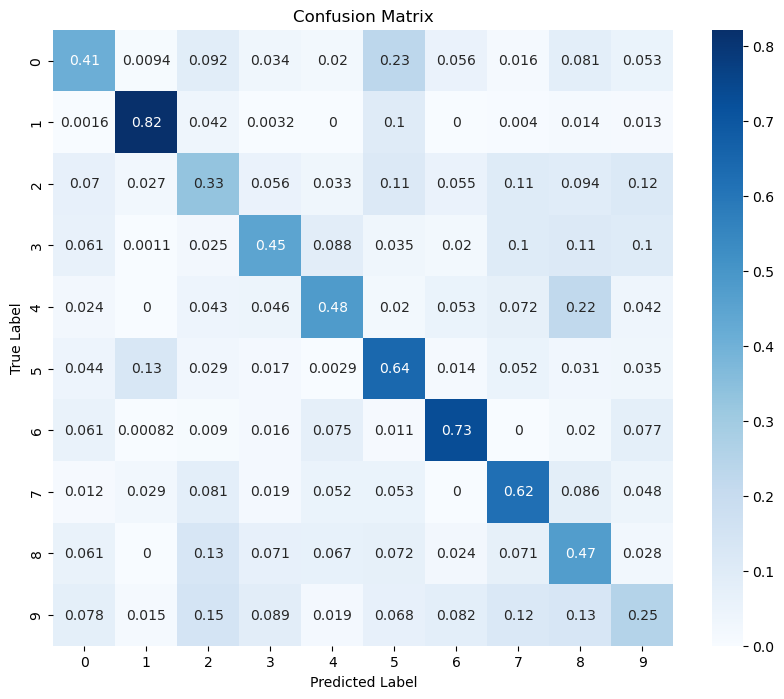

Test Accuracy: 60.53%
Learning rate: 0.0003, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 3.8041, Train Accuracy: 16.84%, Val Loss: 2.2775, Val Accuracy: 19.25%
Epoch [2/60], Train Loss: 2.0559, Train Accuracy: 22.91%, Val Loss: 2.0235, Val Accuracy: 24.33%
Epoch [3/60], Train Loss: 1.7925, Train Accuracy: 34.42%, Val Loss: 1.8217, Val Accuracy: 30.75%
Epoch [4/60], Train Loss: 1.6852, Train Accuracy: 37.69%, Val Loss: 1.7531, Val Accuracy: 32.89%
Epoch [5/60], Train Loss: 1.5630, Train Accuracy: 41.58%, Val Loss: 1.6301, Val Accuracy: 39.04%
Epoch [6/60], Train Loss: 1.5441, Train Accuracy: 42.21%, Val Loss: 1.7822, Val Accuracy: 36.63%
Epoch [7/60], Train Loss: 1.5136, Train Accuracy: 43.93%, Val Loss: 1.5694, Val Accuracy: 43.05%
Epoch [8/60], Train Loss: 1.4322, Train Accuracy: 46.39%, Val Loss: 1.4754, Val Accuracy: 45.19%
Epoch [9/60], Train Loss: 1.4133, Train Accuracy: 48.63%, Val Loss: 1.5822, Val Accuracy: 40.64%
Epoch [10/60], Train Loss: 1.3310, Train Accuracy: 50.

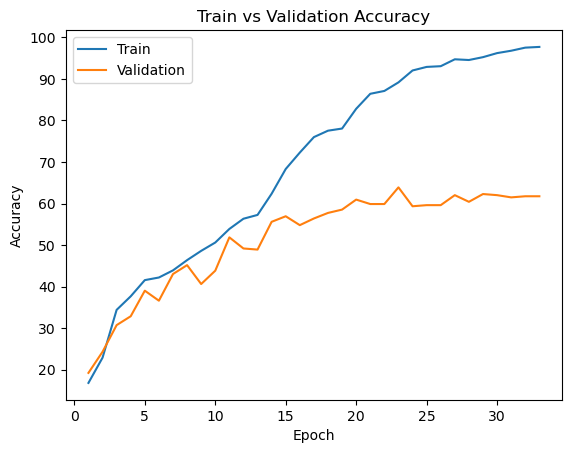

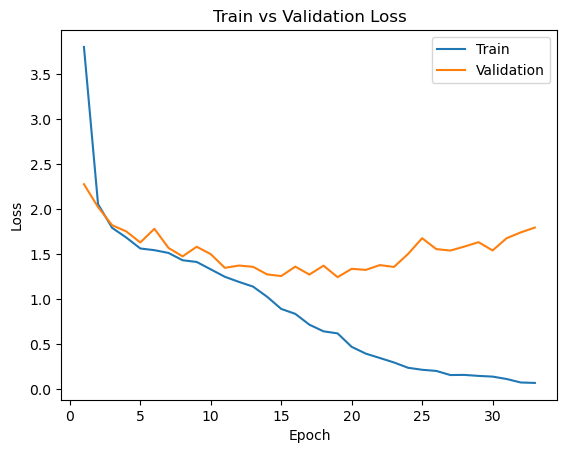

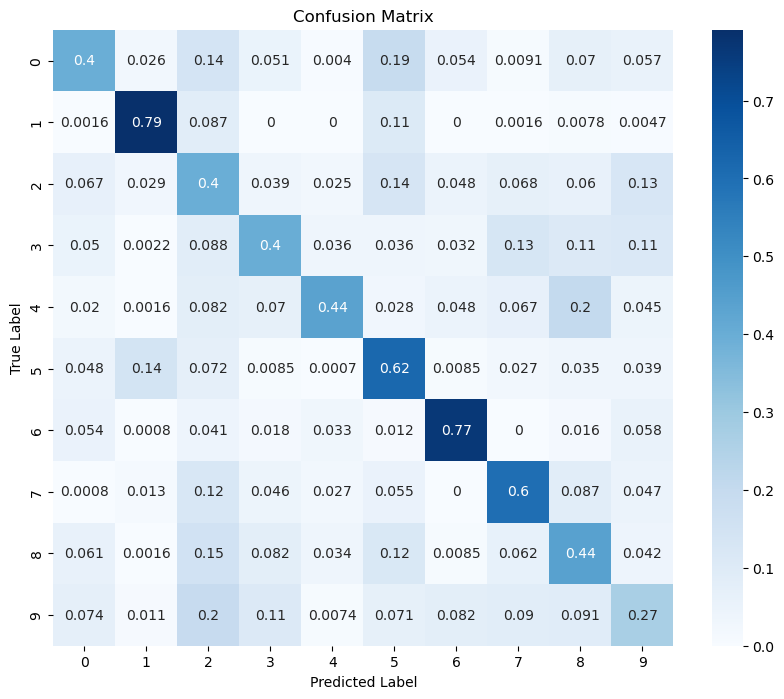

Test Accuracy: 64.00%
Learning rate: 0.0005, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 5.0708, Train Accuracy: 11.45%, Val Loss: 2.2796, Val Accuracy: 11.50%
Epoch [2/60], Train Loss: 2.2231, Train Accuracy: 16.67%, Val Loss: 2.2094, Val Accuracy: 14.97%
Epoch [3/60], Train Loss: 2.1241, Train Accuracy: 21.25%, Val Loss: 2.0808, Val Accuracy: 24.60%
Epoch [4/60], Train Loss: 2.0299, Train Accuracy: 24.34%, Val Loss: 2.0444, Val Accuracy: 25.94%
Epoch [5/60], Train Loss: 1.9358, Train Accuracy: 29.44%, Val Loss: 1.9290, Val Accuracy: 28.61%
Epoch [6/60], Train Loss: 1.8218, Train Accuracy: 32.88%, Val Loss: 1.7679, Val Accuracy: 37.17%
Epoch [7/60], Train Loss: 1.6506, Train Accuracy: 38.95%, Val Loss: 1.6472, Val Accuracy: 35.56%
Epoch [8/60], Train Loss: 1.6223, Train Accuracy: 39.52%, Val Loss: 1.6501, Val Accuracy: 37.17%
Epoch [9/60], Train Loss: 1.6057, Train Accuracy: 39.92%, Val Loss: 1.5989, Val Accuracy: 39.57%
Epoch [10/60], Train Loss: 1.5665, Train Accuracy: 41.

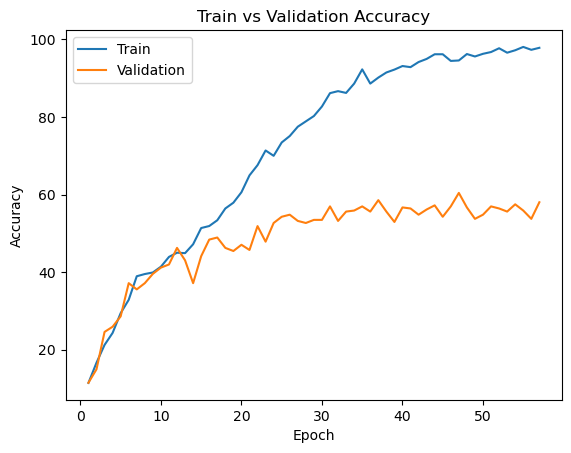

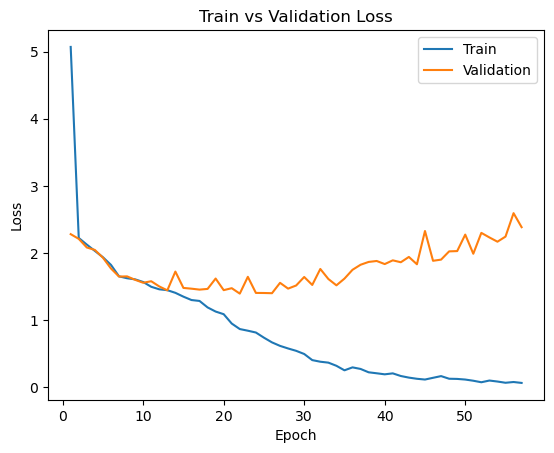

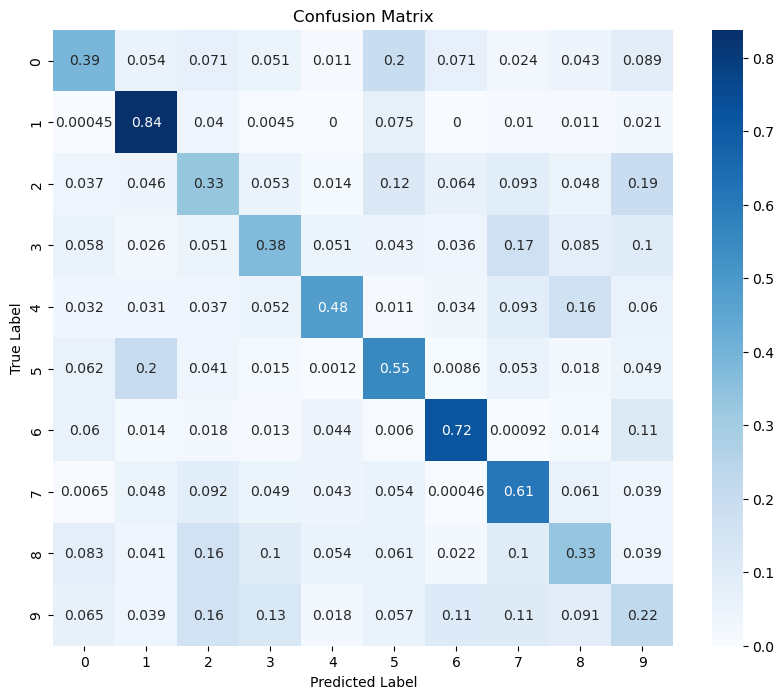

Test Accuracy: 59.47%


In [4]:
mfcc_data_dir = os.path.join(root_dir, "datasources", "mfcc")
mfcc_data_handler = DataHandler(mfcc_data_dir, batch_size=32, num_workers=4)
for ss, g in [(10, 1.0), (10, 0.8)]:
    for lr in [5e-5, 1e-4, 2e-4, 3e-4, 5e-4]:
        num_epochs = 60
        mfcc_cnn = mfcc_model.MFCC_CNN_2conv()
        print(f"Learning rate: {lr}, Subset size: {ss}, Gamma: {g}")
        best_epoch = training.train(mfcc_cnn, mfcc_data_handler.train_loader, mfcc_data_handler.val_loader, num_epochs, lr, 32, ss, g, patience=10)
        model_path = training.get_model_name(mfcc_cnn.name, 32, lr, best_epoch)
        %matplotlib inline
        plot.plot_training_curve(model_path)
        plot.plot_confusion_matrix(model_path, range(10))
        # test the model
        test_data = mfcc_data_handler.test_loader
        mfcc_cnn.load_state_dict(torch.load(f"./models/{model_path}.pt"))
        training.test_model(mfcc_cnn, test_data)

In [3]:
# mfcc model using resnet pretrained
from torchvision import models
import torch.nn as nn
import torch

class MFCC_Resnet(nn.Module):
    def __init__(self, num_classes=10):
        super(MFCC_Resnet, self).__init__()
        self.name = "MFCC_Resnet"
        self.num_classes = num_classes
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Linear(512, num_classes)
        
    def forward(self, x):
        return self.resnet(x)


c:\Users\Jack\.conda\envs\aps360\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Jack\.conda\envs\aps360\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Jack/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


Learning rate: 5e-05, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 1.6245, Train Accuracy: 42.15%, Val Loss: 1.2761, Val Accuracy: 55.08%
Epoch [2/60], Train Loss: 1.0285, Train Accuracy: 66.90%, Val Loss: 1.0287, Val Accuracy: 63.90%
Epoch [3/60], Train Loss: 0.7130, Train Accuracy: 79.21%, Val Loss: 1.0139, Val Accuracy: 65.51%
Epoch [4/60], Train Loss: 0.4880, Train Accuracy: 87.17%, Val Loss: 0.8986, Val Accuracy: 70.32%
Epoch [5/60], Train Loss: 0.3061, Train Accuracy: 93.24%, Val Loss: 0.8655, Val Accuracy: 71.66%
Epoch [6/60], Train Loss: 0.1907, Train Accuracy: 97.02%, Val Loss: 0.8102, Val Accuracy: 75.40%
Epoch [7/60], Train Loss: 0.1003, Train Accuracy: 99.20%, Val Loss: 0.7982, Val Accuracy: 74.87%
Epoch [8/60], Train Loss: 0.0702, Train Accuracy: 99.43%, Val Loss: 0.8291, Val Accuracy: 72.19%
Epoch [9/60], Train Loss: 0.0482, Train Accuracy: 99.71%, Val Loss: 0.8098, Val Accuracy: 72.46%
Epoch [10/60], Train Loss: 0.0311, Train Accuracy: 100.00%, Val Loss: 0.7654,

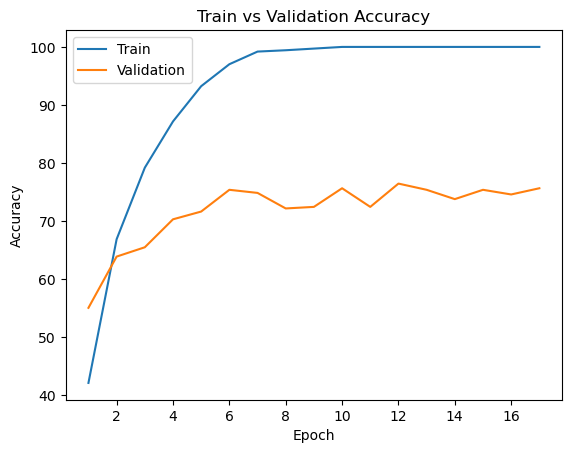

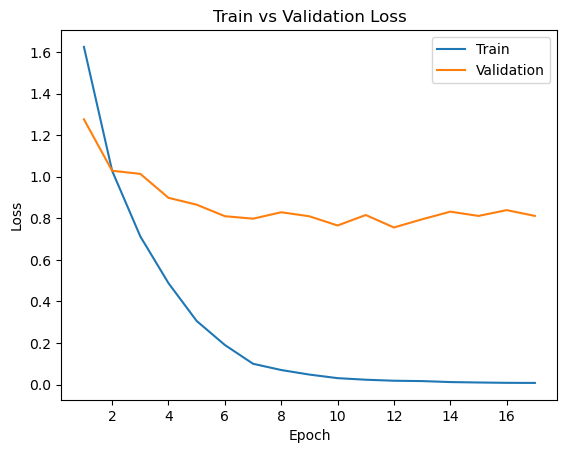

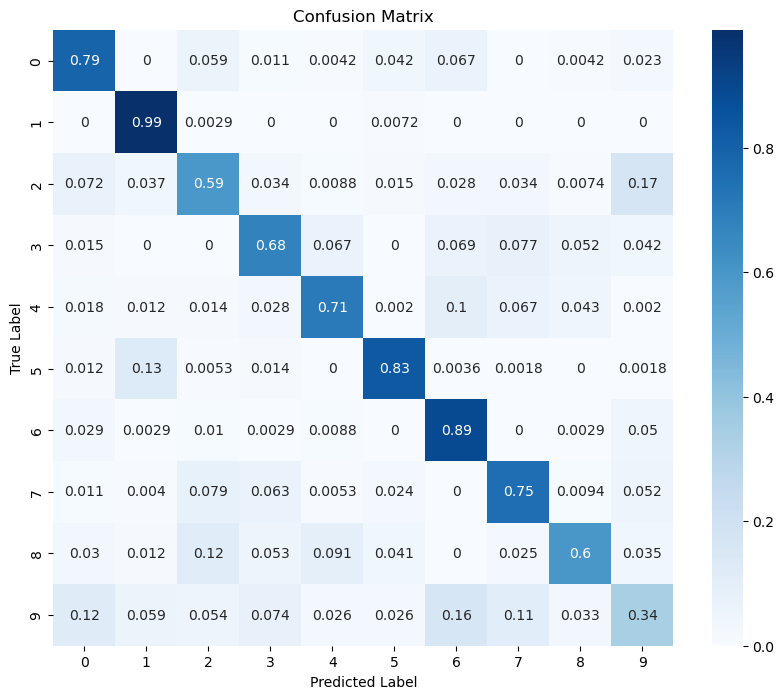

Test Accuracy: 73.60%
Learning rate: 0.0001, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 1.4423, Train Accuracy: 48.45%, Val Loss: 1.1922, Val Accuracy: 60.16%
Epoch [2/60], Train Loss: 0.8747, Train Accuracy: 70.05%, Val Loss: 1.0855, Val Accuracy: 66.04%
Epoch [3/60], Train Loss: 0.6038, Train Accuracy: 80.58%, Val Loss: 1.1393, Val Accuracy: 61.50%
Epoch [4/60], Train Loss: 0.3406, Train Accuracy: 90.26%, Val Loss: 1.0254, Val Accuracy: 66.04%
Epoch [5/60], Train Loss: 0.1794, Train Accuracy: 96.22%, Val Loss: 0.9125, Val Accuracy: 70.32%
Epoch [6/60], Train Loss: 0.1413, Train Accuracy: 96.74%, Val Loss: 0.8829, Val Accuracy: 73.26%
Epoch [7/60], Train Loss: 0.0656, Train Accuracy: 98.97%, Val Loss: 0.8503, Val Accuracy: 73.26%
Epoch [8/60], Train Loss: 0.0398, Train Accuracy: 99.54%, Val Loss: 0.8898, Val Accuracy: 73.53%
Epoch [9/60], Train Loss: 0.0371, Train Accuracy: 99.20%, Val Loss: 0.9946, Val Accuracy: 71.12%
Epoch [10/60], Train Loss: 0.0292, Train Accuracy: 99.

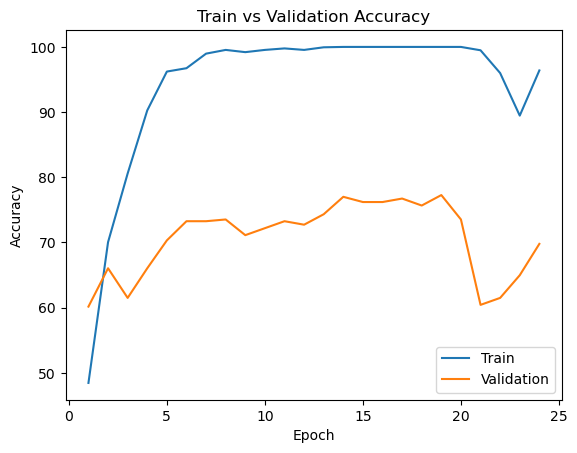

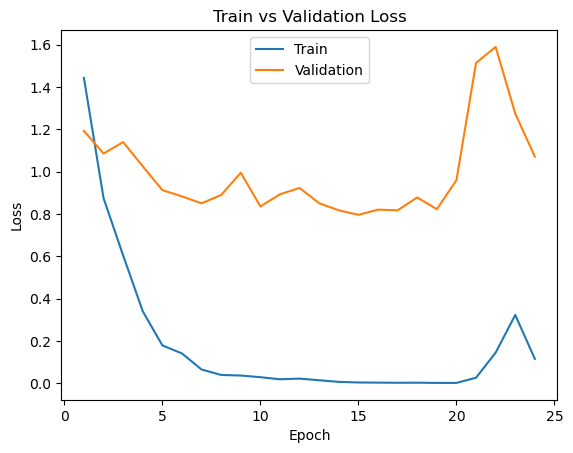

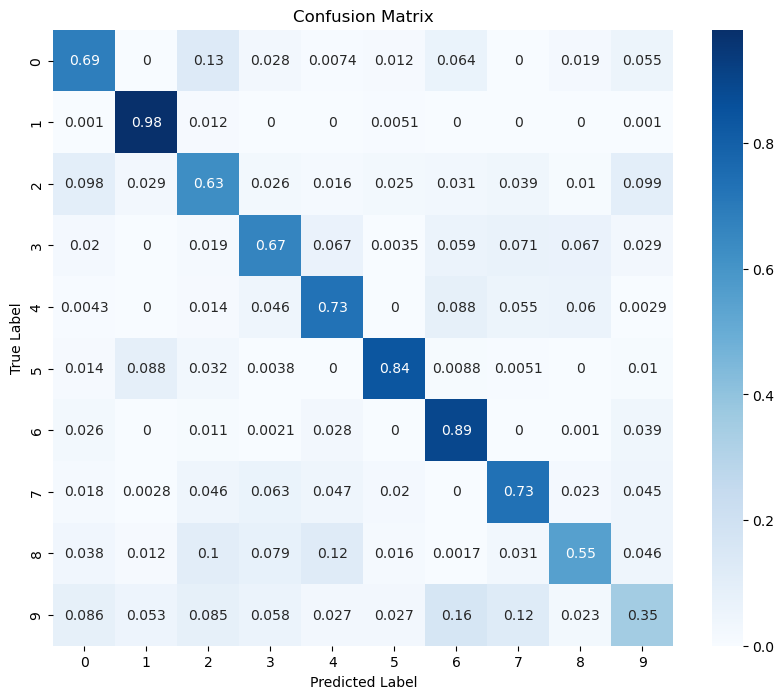

Test Accuracy: 76.00%
Learning rate: 0.0002, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 1.4295, Train Accuracy: 49.66%, Val Loss: 1.2484, Val Accuracy: 58.02%
Epoch [2/60], Train Loss: 0.8973, Train Accuracy: 68.44%, Val Loss: 1.0450, Val Accuracy: 64.71%
Epoch [3/60], Train Loss: 0.6435, Train Accuracy: 78.87%, Val Loss: 1.0783, Val Accuracy: 64.97%
Epoch [4/60], Train Loss: 0.4214, Train Accuracy: 86.14%, Val Loss: 1.0998, Val Accuracy: 62.83%
Epoch [5/60], Train Loss: 0.2574, Train Accuracy: 92.55%, Val Loss: 1.4315, Val Accuracy: 60.96%
Epoch [6/60], Train Loss: 0.1911, Train Accuracy: 93.99%, Val Loss: 0.9432, Val Accuracy: 72.99%
Epoch [7/60], Train Loss: 0.1136, Train Accuracy: 97.02%, Val Loss: 1.0142, Val Accuracy: 69.25%
Epoch [8/60], Train Loss: 0.0791, Train Accuracy: 98.00%, Val Loss: 0.9448, Val Accuracy: 73.26%
Epoch [9/60], Train Loss: 0.0772, Train Accuracy: 97.59%, Val Loss: 0.9185, Val Accuracy: 73.53%
Epoch [10/60], Train Loss: 0.0716, Train Accuracy: 98.

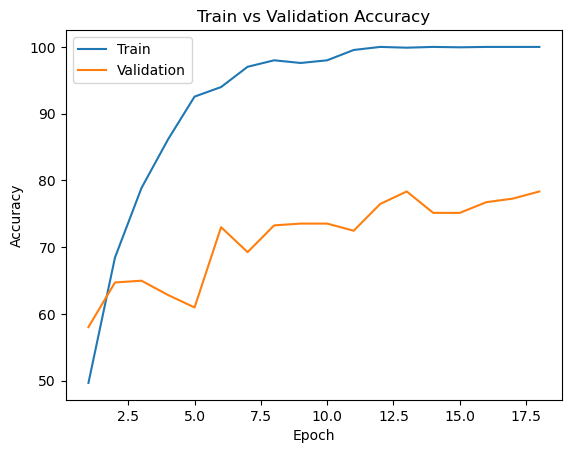

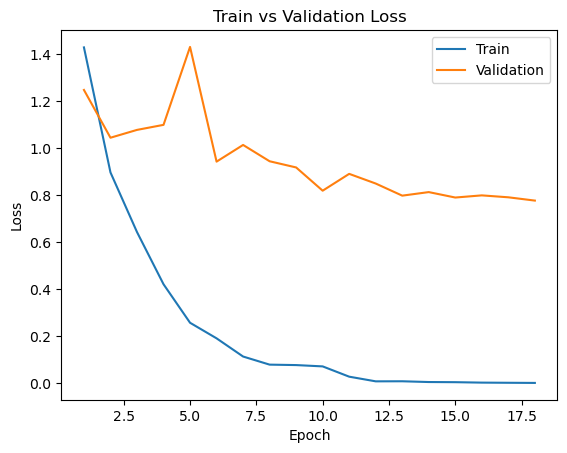

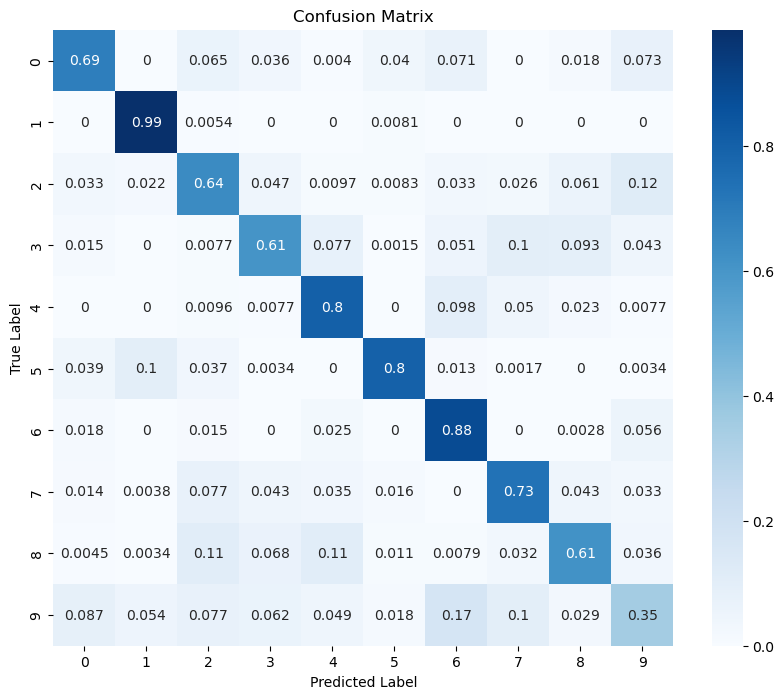

Test Accuracy: 77.33%
Learning rate: 0.0003, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 1.5103, Train Accuracy: 45.99%, Val Loss: 1.3932, Val Accuracy: 51.87%
Epoch [2/60], Train Loss: 1.0532, Train Accuracy: 63.34%, Val Loss: 1.3899, Val Accuracy: 55.35%
Epoch [3/60], Train Loss: 0.8201, Train Accuracy: 70.96%, Val Loss: 1.1989, Val Accuracy: 60.16%
Epoch [4/60], Train Loss: 0.6463, Train Accuracy: 77.43%, Val Loss: 1.1079, Val Accuracy: 62.30%
Epoch [5/60], Train Loss: 0.4508, Train Accuracy: 84.65%, Val Loss: 1.3396, Val Accuracy: 63.90%
Epoch [6/60], Train Loss: 0.3074, Train Accuracy: 89.52%, Val Loss: 1.2115, Val Accuracy: 65.78%
Epoch [7/60], Train Loss: 0.2181, Train Accuracy: 92.50%, Val Loss: 1.1266, Val Accuracy: 67.38%
Epoch [8/60], Train Loss: 0.1353, Train Accuracy: 96.28%, Val Loss: 0.9633, Val Accuracy: 70.86%
Epoch [9/60], Train Loss: 0.1160, Train Accuracy: 96.62%, Val Loss: 1.0772, Val Accuracy: 69.79%
Epoch [10/60], Train Loss: 0.0645, Train Accuracy: 98.

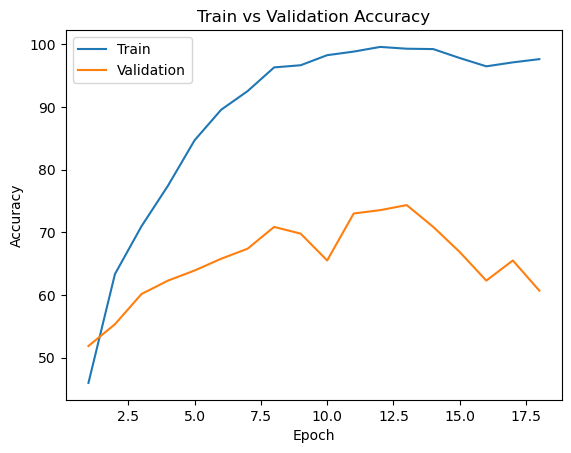

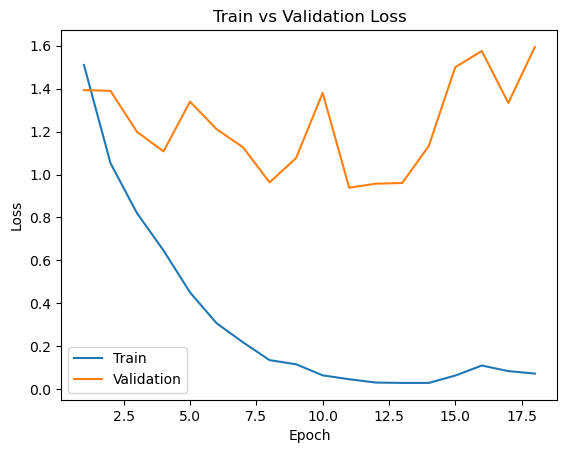

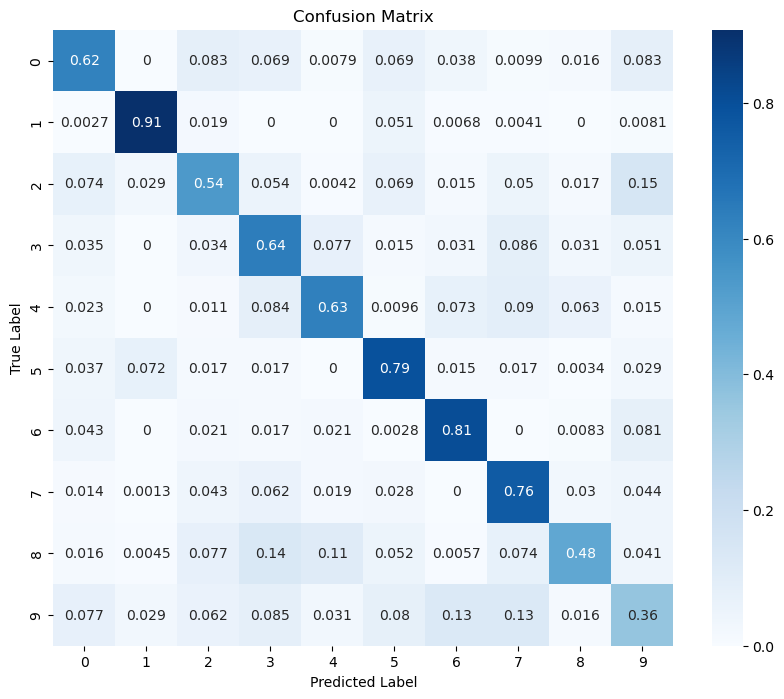

Test Accuracy: 74.13%
Learning rate: 0.0005, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 1.5619, Train Accuracy: 43.36%, Val Loss: 1.4308, Val Accuracy: 49.47%
Epoch [2/60], Train Loss: 1.1418, Train Accuracy: 60.37%, Val Loss: 1.6069, Val Accuracy: 49.47%
Epoch [3/60], Train Loss: 0.9557, Train Accuracy: 66.67%, Val Loss: 1.3770, Val Accuracy: 55.08%
Epoch [4/60], Train Loss: 0.7512, Train Accuracy: 74.68%, Val Loss: 1.1993, Val Accuracy: 66.31%
Epoch [5/60], Train Loss: 0.6047, Train Accuracy: 79.04%, Val Loss: 1.3305, Val Accuracy: 60.43%
Epoch [6/60], Train Loss: 0.5248, Train Accuracy: 82.36%, Val Loss: 1.5928, Val Accuracy: 60.96%
Epoch [7/60], Train Loss: 0.3646, Train Accuracy: 87.86%, Val Loss: 1.2079, Val Accuracy: 66.58%
Epoch [8/60], Train Loss: 0.2447, Train Accuracy: 92.15%, Val Loss: 1.6934, Val Accuracy: 62.03%
Epoch [9/60], Train Loss: 0.2237, Train Accuracy: 92.61%, Val Loss: 1.2725, Val Accuracy: 70.32%
Epoch [10/60], Train Loss: 0.1466, Train Accuracy: 95.

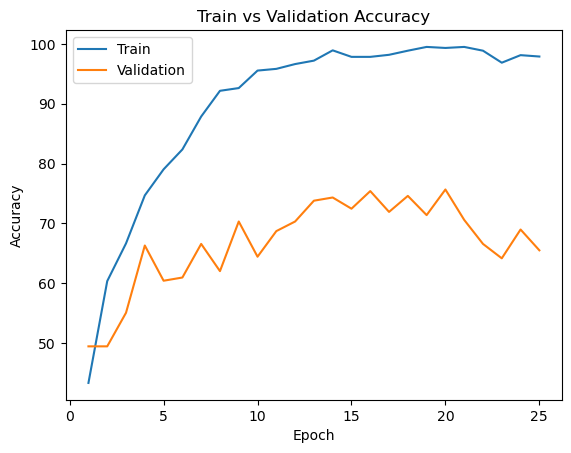

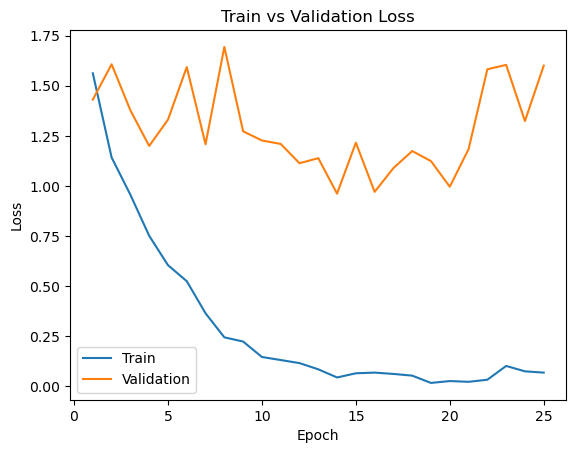

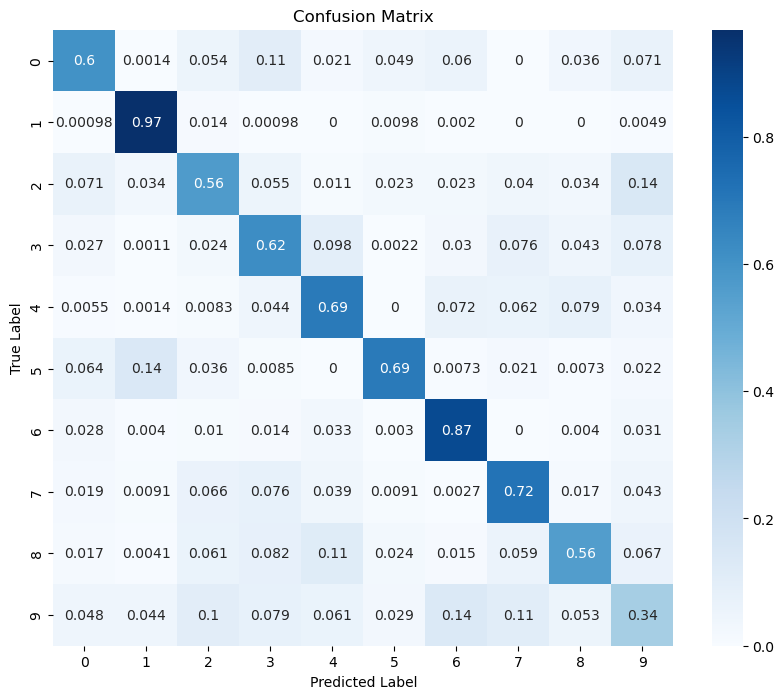

Test Accuracy: 72.27%
Learning rate: 5e-05, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.6251, Train Accuracy: 44.39%, Val Loss: 1.2628, Val Accuracy: 58.02%
Epoch [2/60], Train Loss: 0.9799, Train Accuracy: 68.50%, Val Loss: 1.0515, Val Accuracy: 65.24%
Epoch [3/60], Train Loss: 0.6642, Train Accuracy: 80.81%, Val Loss: 0.9921, Val Accuracy: 64.97%
Epoch [4/60], Train Loss: 0.4308, Train Accuracy: 88.72%, Val Loss: 0.8626, Val Accuracy: 70.32%
Epoch [5/60], Train Loss: 0.2676, Train Accuracy: 95.25%, Val Loss: 0.8386, Val Accuracy: 70.59%
Epoch [6/60], Train Loss: 0.1535, Train Accuracy: 98.51%, Val Loss: 0.8253, Val Accuracy: 71.12%
Epoch [7/60], Train Loss: 0.0979, Train Accuracy: 98.97%, Val Loss: 0.8338, Val Accuracy: 73.26%
Epoch [8/60], Train Loss: 0.0556, Train Accuracy: 99.83%, Val Loss: 0.8460, Val Accuracy: 71.93%
Epoch [9/60], Train Loss: 0.0352, Train Accuracy: 99.89%, Val Loss: 0.7811, Val Accuracy: 76.20%
Epoch [10/60], Train Loss: 0.0262, Train Accuracy: 100.

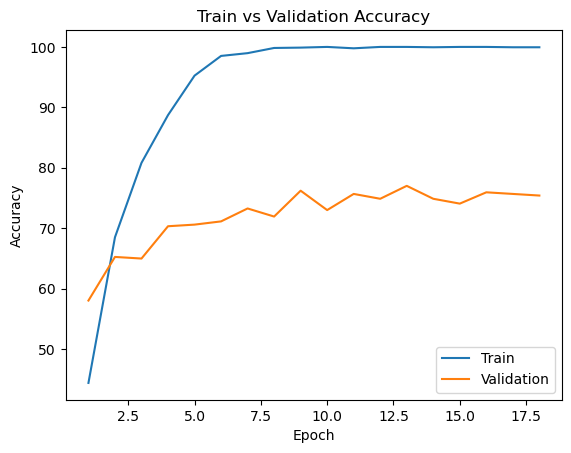

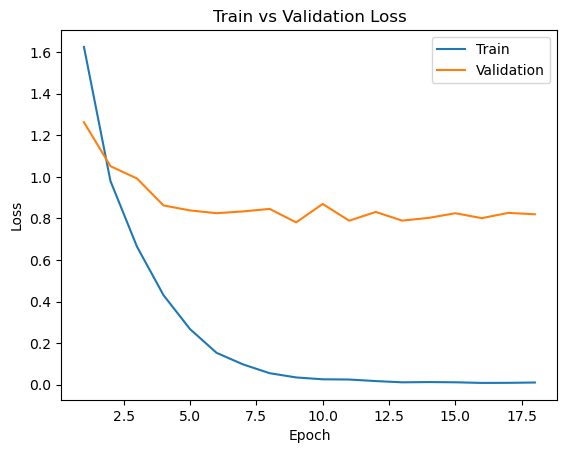

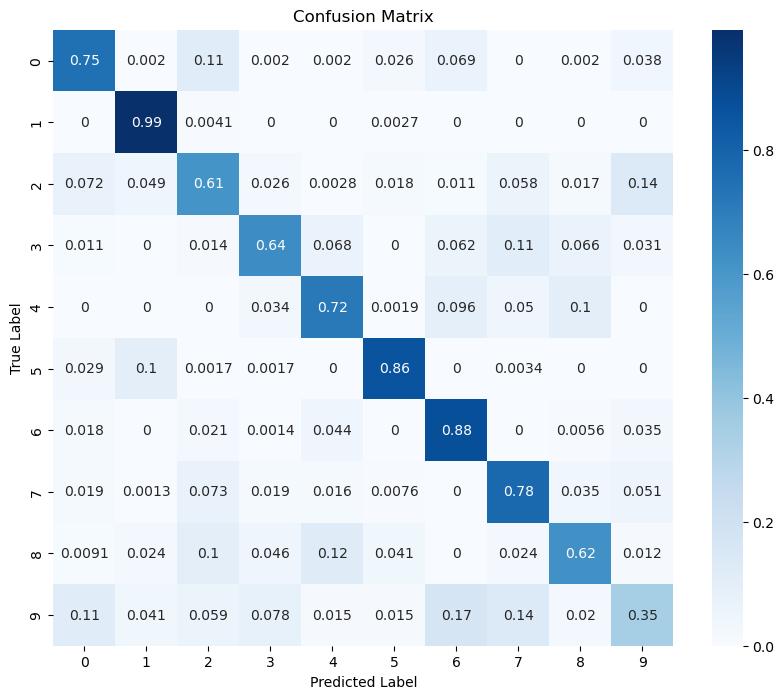

Test Accuracy: 75.20%
Learning rate: 0.0001, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.4991, Train Accuracy: 46.33%, Val Loss: 1.2546, Val Accuracy: 57.22%
Epoch [2/60], Train Loss: 0.8988, Train Accuracy: 69.47%, Val Loss: 1.0858, Val Accuracy: 65.24%
Epoch [3/60], Train Loss: 0.6165, Train Accuracy: 79.90%, Val Loss: 1.0301, Val Accuracy: 63.64%
Epoch [4/60], Train Loss: 0.3877, Train Accuracy: 87.86%, Val Loss: 1.0037, Val Accuracy: 69.25%
Epoch [5/60], Train Loss: 0.1918, Train Accuracy: 95.59%, Val Loss: 1.0448, Val Accuracy: 65.24%
Epoch [6/60], Train Loss: 0.1278, Train Accuracy: 97.31%, Val Loss: 0.8216, Val Accuracy: 74.87%
Epoch [7/60], Train Loss: 0.0524, Train Accuracy: 99.48%, Val Loss: 0.7838, Val Accuracy: 75.13%
Epoch [8/60], Train Loss: 0.0395, Train Accuracy: 99.54%, Val Loss: 0.8121, Val Accuracy: 75.13%
Epoch [9/60], Train Loss: 0.0272, Train Accuracy: 99.77%, Val Loss: 0.8143, Val Accuracy: 73.80%
Epoch [10/60], Train Loss: 0.0174, Train Accuracy: 100

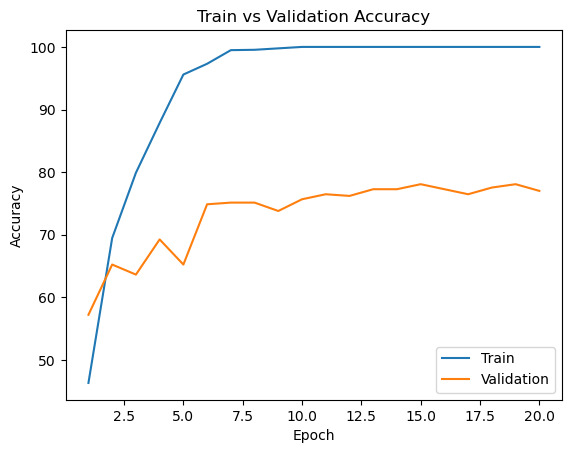

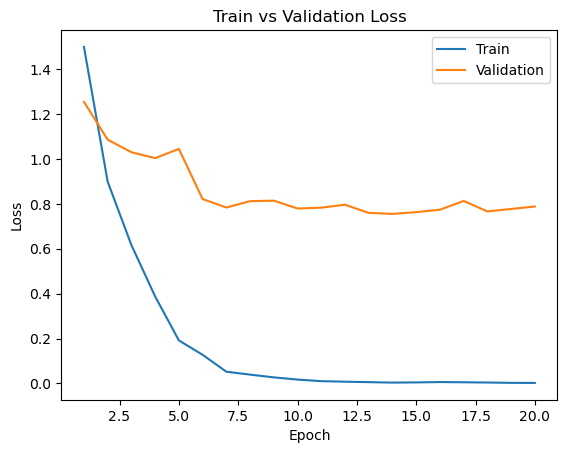

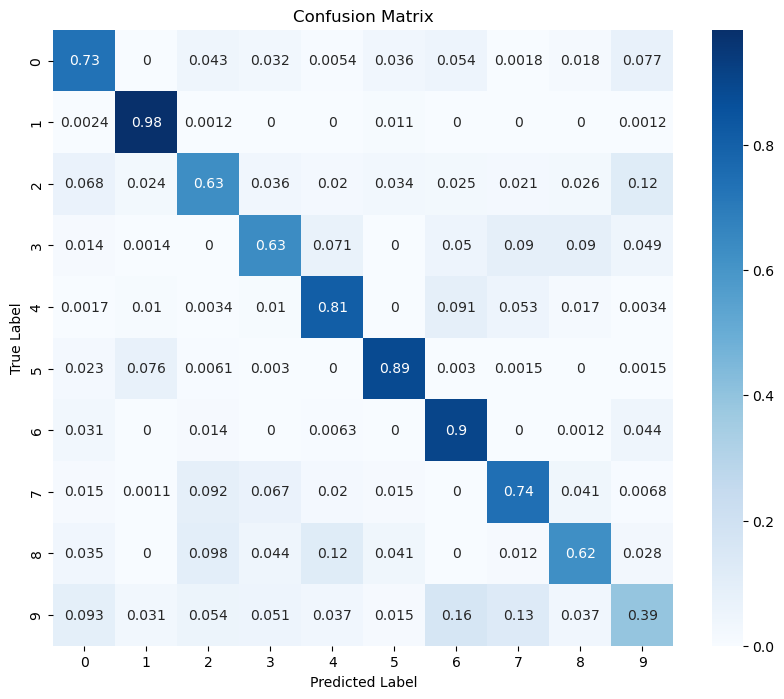

Test Accuracy: 75.20%
Learning rate: 0.0002, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.4508, Train Accuracy: 47.25%, Val Loss: 1.2571, Val Accuracy: 57.22%
Epoch [2/60], Train Loss: 0.9746, Train Accuracy: 65.06%, Val Loss: 1.0802, Val Accuracy: 65.24%
Epoch [3/60], Train Loss: 0.6829, Train Accuracy: 76.23%, Val Loss: 1.4040, Val Accuracy: 54.01%
Epoch [4/60], Train Loss: 0.4758, Train Accuracy: 84.25%, Val Loss: 0.9938, Val Accuracy: 68.72%
Epoch [5/60], Train Loss: 0.2513, Train Accuracy: 91.87%, Val Loss: 0.7626, Val Accuracy: 75.94%
Epoch [6/60], Train Loss: 0.2141, Train Accuracy: 92.96%, Val Loss: 1.0746, Val Accuracy: 70.59%
Epoch [7/60], Train Loss: 0.1282, Train Accuracy: 96.16%, Val Loss: 0.8841, Val Accuracy: 73.53%
Epoch [8/60], Train Loss: 0.0678, Train Accuracy: 98.05%, Val Loss: 0.8718, Val Accuracy: 75.13%
Epoch [9/60], Train Loss: 0.0639, Train Accuracy: 98.28%, Val Loss: 1.0483, Val Accuracy: 70.59%
Epoch [10/60], Train Loss: 0.1052, Train Accuracy: 96.

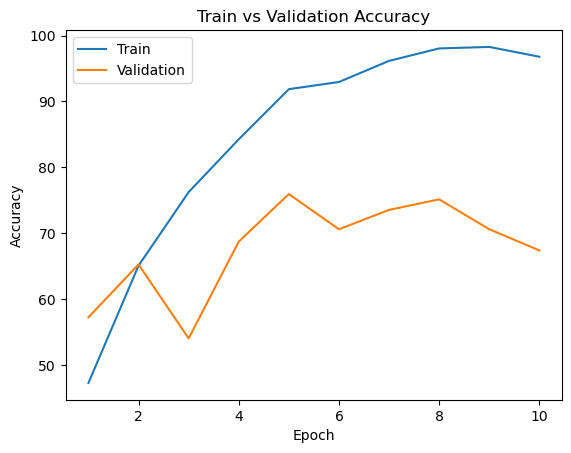

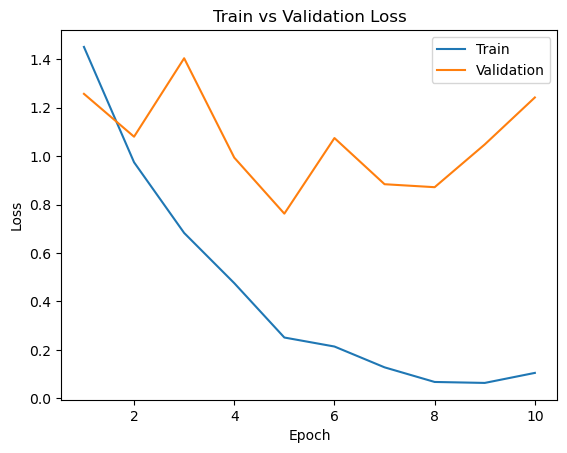

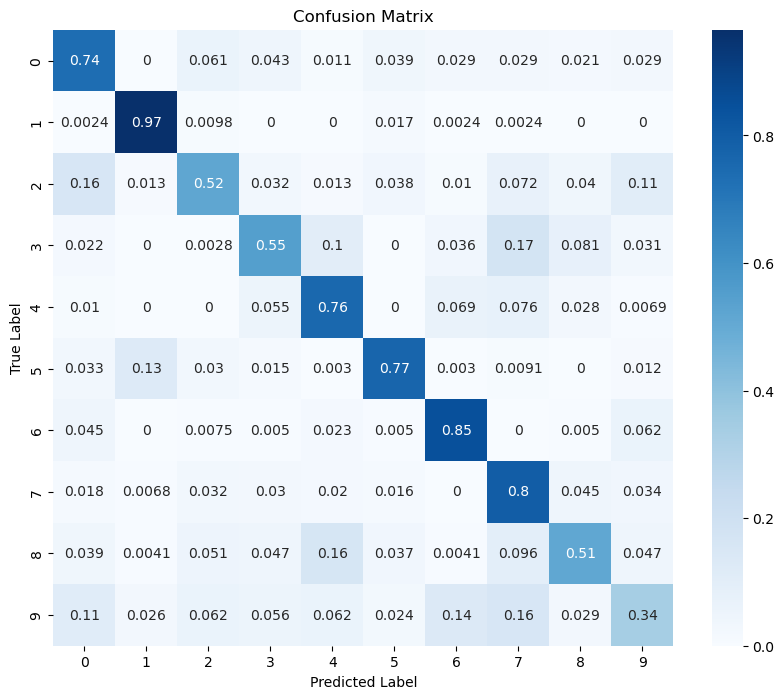

Test Accuracy: 74.13%
Learning rate: 0.0003, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.4979, Train Accuracy: 46.11%, Val Loss: 1.6504, Val Accuracy: 46.52%
Epoch [2/60], Train Loss: 1.0393, Train Accuracy: 63.57%, Val Loss: 1.6190, Val Accuracy: 52.14%
Epoch [3/60], Train Loss: 0.7994, Train Accuracy: 70.50%, Val Loss: 1.1902, Val Accuracy: 59.63%
Epoch [4/60], Train Loss: 0.6034, Train Accuracy: 78.81%, Val Loss: 1.2351, Val Accuracy: 62.30%
Epoch [5/60], Train Loss: 0.4092, Train Accuracy: 86.54%, Val Loss: 1.0884, Val Accuracy: 68.72%
Epoch [6/60], Train Loss: 0.3042, Train Accuracy: 88.95%, Val Loss: 1.3805, Val Accuracy: 60.70%
Epoch [7/60], Train Loss: 0.1955, Train Accuracy: 94.44%, Val Loss: 0.9263, Val Accuracy: 71.39%
Epoch [8/60], Train Loss: 0.1403, Train Accuracy: 95.65%, Val Loss: 1.0930, Val Accuracy: 71.39%
Epoch [9/60], Train Loss: 0.1028, Train Accuracy: 97.48%, Val Loss: 1.2995, Val Accuracy: 64.97%
Epoch [10/60], Train Loss: 0.0906, Train Accuracy: 97.

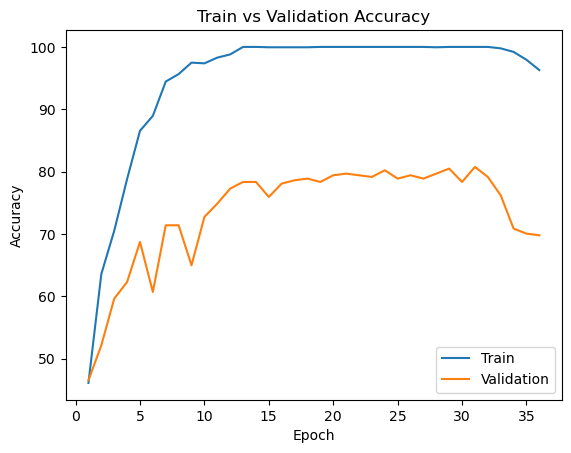

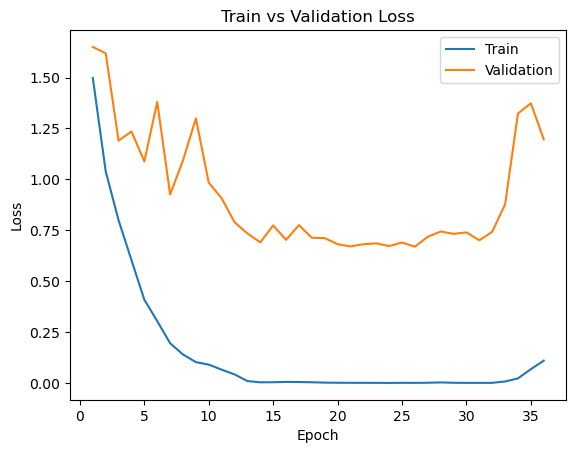

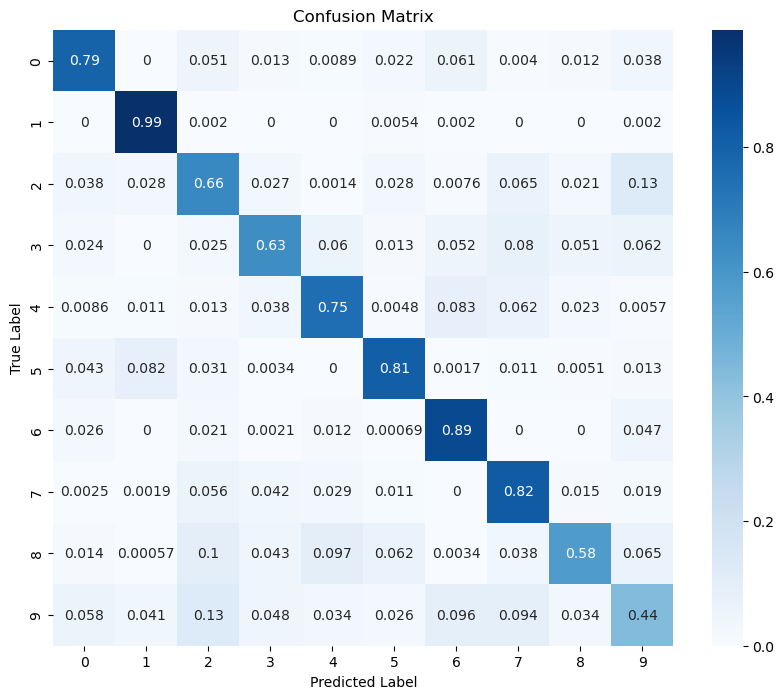

Test Accuracy: 79.20%
Learning rate: 0.0005, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.5661, Train Accuracy: 43.87%, Val Loss: 1.6751, Val Accuracy: 47.59%
Epoch [2/60], Train Loss: 1.1617, Train Accuracy: 58.13%, Val Loss: 1.5125, Val Accuracy: 51.87%
Epoch [3/60], Train Loss: 0.9192, Train Accuracy: 67.58%, Val Loss: 1.5209, Val Accuracy: 55.08%
Epoch [4/60], Train Loss: 0.7582, Train Accuracy: 74.05%, Val Loss: 1.1926, Val Accuracy: 59.09%
Epoch [5/60], Train Loss: 0.5355, Train Accuracy: 82.02%, Val Loss: 1.1304, Val Accuracy: 65.78%
Epoch [6/60], Train Loss: 0.4179, Train Accuracy: 85.91%, Val Loss: 1.3042, Val Accuracy: 64.17%
Epoch [7/60], Train Loss: 0.3242, Train Accuracy: 88.77%, Val Loss: 1.8341, Val Accuracy: 58.56%
Epoch [8/60], Train Loss: 0.2592, Train Accuracy: 91.01%, Val Loss: 1.3646, Val Accuracy: 63.64%
Epoch [9/60], Train Loss: 0.2045, Train Accuracy: 93.18%, Val Loss: 1.5988, Val Accuracy: 65.78%
Epoch [10/60], Train Loss: 0.1396, Train Accuracy: 96.

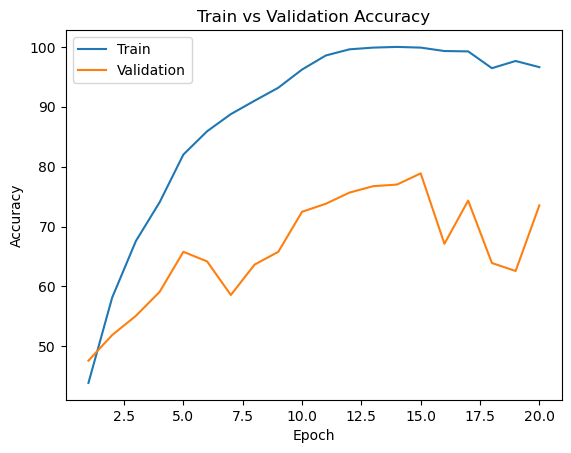

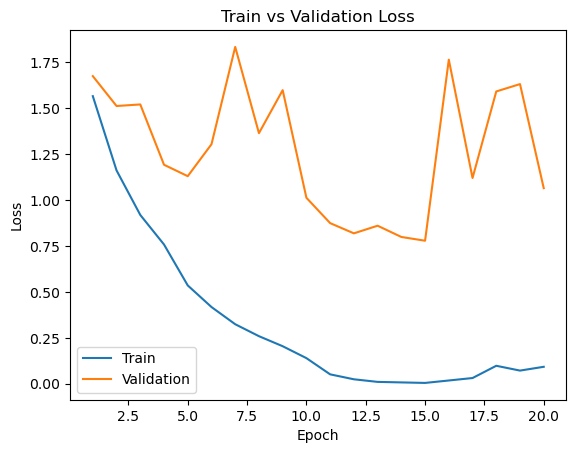

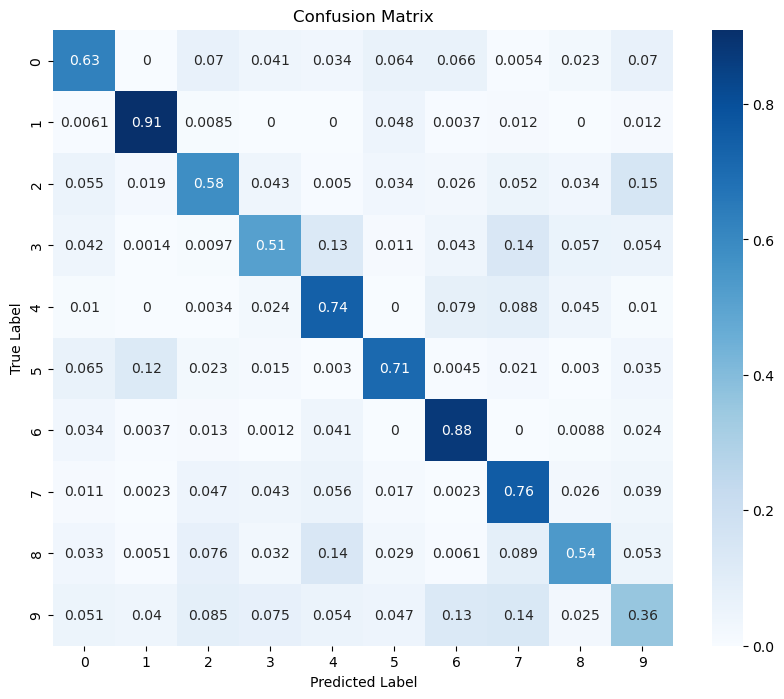

Test Accuracy: 76.27%


In [16]:
root_dir = "."
mfcc_data_dir = os.path.join(root_dir, "datasources", "mfcc")
mfcc_data_handler = DataHandler(mfcc_data_dir, batch_size=32, num_workers=4)
for ss, g in [(10, 1.0), (10, 0.8)]:
    for lr in [5e-5, 1e-4, 2e-4, 3e-4, 5e-4]:
        num_epochs = 60
        mfcc_cnn = MFCC_Resnet()
        print(f"Learning rate: {lr}, Subset size: {ss}, Gamma: {g}")
        best_epoch = training.train(mfcc_cnn, mfcc_data_handler.train_loader, mfcc_data_handler.val_loader, num_epochs, lr, 32, ss, g, patience=5)
        model_path = training.get_model_name(mfcc_cnn.name, 32, lr, best_epoch)
        %matplotlib inline
        plot.plot_training_curve(model_path)
        plot.plot_confusion_matrix(model_path, range(10))
        # test the model
        test_data = mfcc_data_handler.test_loader
        mfcc_cnn.load_state_dict(torch.load(f"./models/{model_path}.pt"))
        training.test_model(mfcc_cnn, test_data)

Learning rate: 0.0002, Subset size: 10, Gamma: 1.0
Epoch [1/60], Train Loss: 1.4562, Train Accuracy: 49.43%, Val Loss: 1.3585, Val Accuracy: 52.94%
Epoch [2/60], Train Loss: 1.0065, Train Accuracy: 64.89%, Val Loss: 1.2207, Val Accuracy: 56.68%
Epoch [3/60], Train Loss: 0.7176, Train Accuracy: 75.83%, Val Loss: 1.1276, Val Accuracy: 63.10%
Epoch [4/60], Train Loss: 0.4484, Train Accuracy: 85.57%, Val Loss: 1.0199, Val Accuracy: 65.24%
Epoch [5/60], Train Loss: 0.3006, Train Accuracy: 90.84%, Val Loss: 0.8410, Val Accuracy: 74.60%
Epoch [6/60], Train Loss: 0.2014, Train Accuracy: 94.27%, Val Loss: 1.0407, Val Accuracy: 67.91%
Epoch [7/60], Train Loss: 0.1020, Train Accuracy: 97.42%, Val Loss: 0.9506, Val Accuracy: 71.12%
Epoch [8/60], Train Loss: 0.0566, Train Accuracy: 98.57%, Val Loss: 0.8510, Val Accuracy: 72.99%
Epoch [9/60], Train Loss: 0.0553, Train Accuracy: 98.91%, Val Loss: 0.7718, Val Accuracy: 74.60%
Epoch [10/60], Train Loss: 0.0533, Train Accuracy: 98.57%, Val Loss: 0.8186,

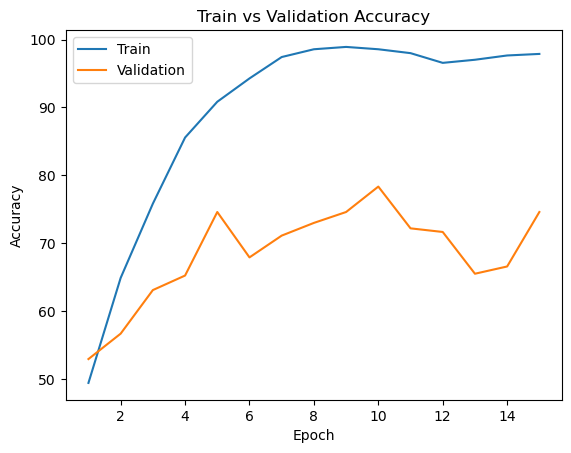

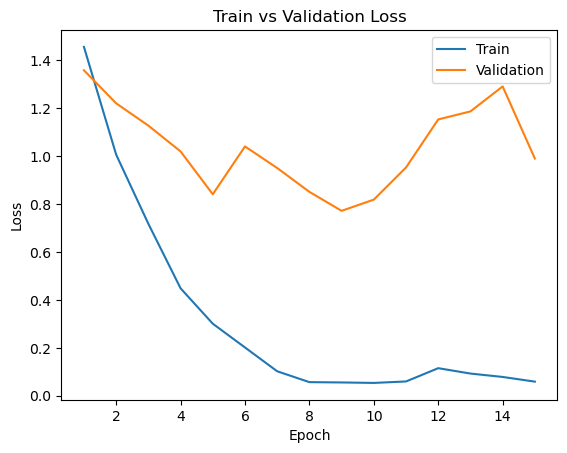

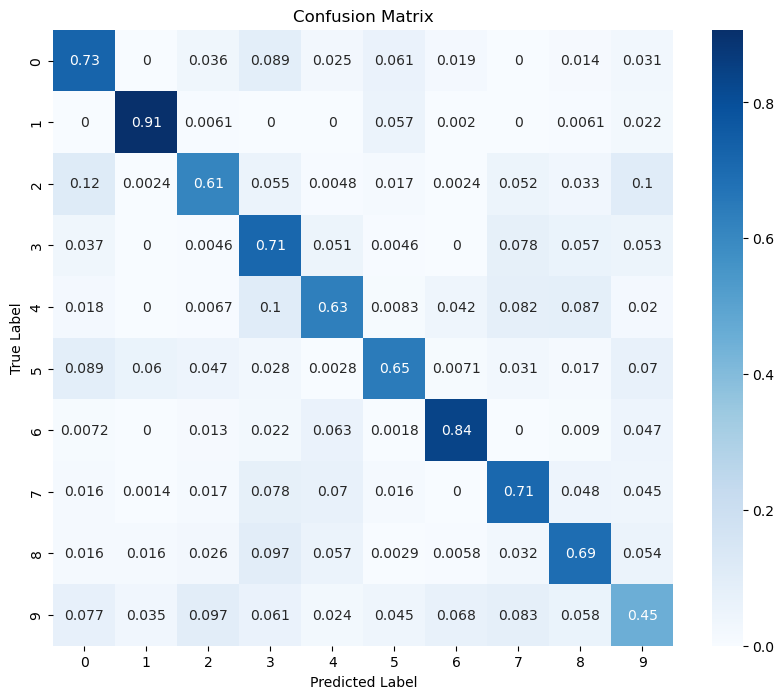

Test Accuracy: 76.00%


In [18]:
# best model
root_dir = "."
mfcc_data_dir = os.path.join(root_dir, "datasources", "mfcc")
mfcc_data_handler = DataHandler(mfcc_data_dir, batch_size=32, num_workers=4)
for ss, g in [(10, 1.0)]:
    for lr in [2e-4]:
        num_epochs = 60
        mfcc_cnn = MFCC_Resnet()
        print(f"Learning rate: {lr}, Subset size: {ss}, Gamma: {g}")
        best_epoch = training.train(mfcc_cnn, mfcc_data_handler.train_loader, mfcc_data_handler.val_loader, num_epochs, lr, 32, ss, g, patience=5)
        model_path = training.get_model_name(mfcc_cnn.name, 32, lr, best_epoch)
        %matplotlib inline
        plot.plot_training_curve(model_path)
        plot.plot_confusion_matrix(model_path, range(10))
        # test the model
        test_data = mfcc_data_handler.test_loader
        mfcc_cnn.load_state_dict(torch.load(f"./models/{model_path}.pt"))
        training.test_model(mfcc_cnn, test_data)

In [23]:
# MFCC with efficientnet
class MFCC_Efficientnet_b0(nn.Module):
    def __init__(self, num_classes=10):
        super(MFCC_Efficientnet_b0, self).__init__()
        self.name = "MFCC_Efficientnet_b0"
        self.num_classes = num_classes
        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier[1] = nn.Linear(1280, num_classes)

        
    def forward(self, x):
        return self.efficientnet(x)

c:\Users\Jack\.conda\envs\aps360\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Jack\.conda\envs\aps360\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Learning rate: 5e-05, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 2.1155, Train Accuracy: 28.18%, Val Loss: 1.8314, Val Accuracy: 40.37%
Epoch [2/60], Train Loss: 1.7475, Train Accuracy: 42.27%, Val Loss: 1.5737, Val Accuracy: 50.00%
Epoch [3/60], Train Loss: 1.5136, Train Accuracy: 50.40%, Val Loss: 1.3855, Val Accuracy: 52.94%
Epoch [4/60], Train Loss: 1.3364, Train Accuracy: 54.52%, Val Loss: 1.2151, Val Accuracy: 58.56%
Epoch [5/60], Train Loss: 1.1781, Train Accuracy: 61.28%, Val Loss: 1.1248, Val Accuracy: 59.63%
Epoch [6/60], Train Loss: 1.0594, Train Accuracy: 65.29%, Val Loss: 1.0232, Val Accuracy: 64.17%
Epoch [7/60], Train Loss: 0.9713, Train Accuracy: 67.30%, Val Loss: 0.9902, Val Accuracy: 63.37%
Epoch [8/60], Train Loss: 0.8356, Train Accuracy: 72.34%, Val Loss: 0.9373, Val Accuracy: 64.71%
Epoch [9/60], Train Loss: 0.7373, Train Accuracy: 76.46%, Val Loss: 0.8950, Val Accuracy: 67.65%
Epoch [10/60], Train Loss: 0.6914, Train Accuracy: 75.95%, Val Loss: 0.9377, 

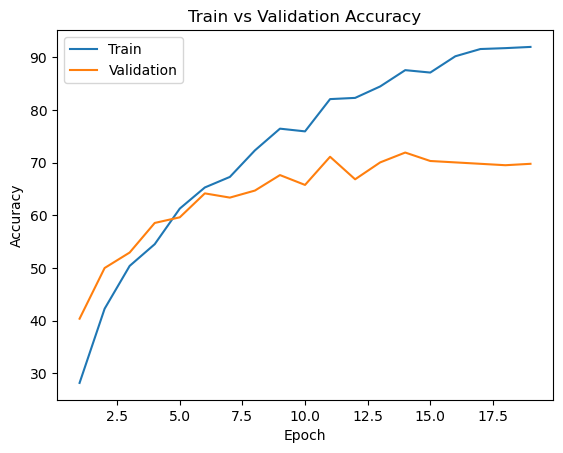

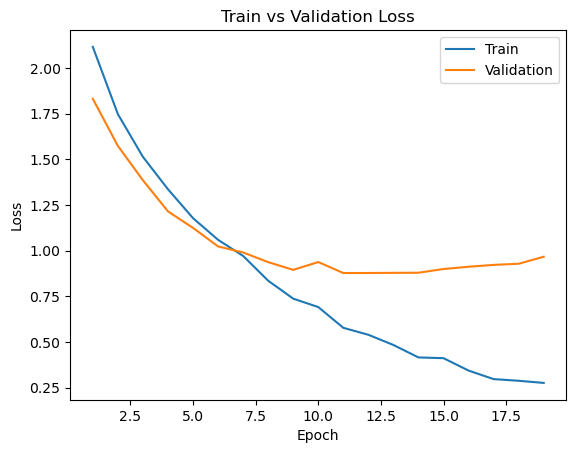

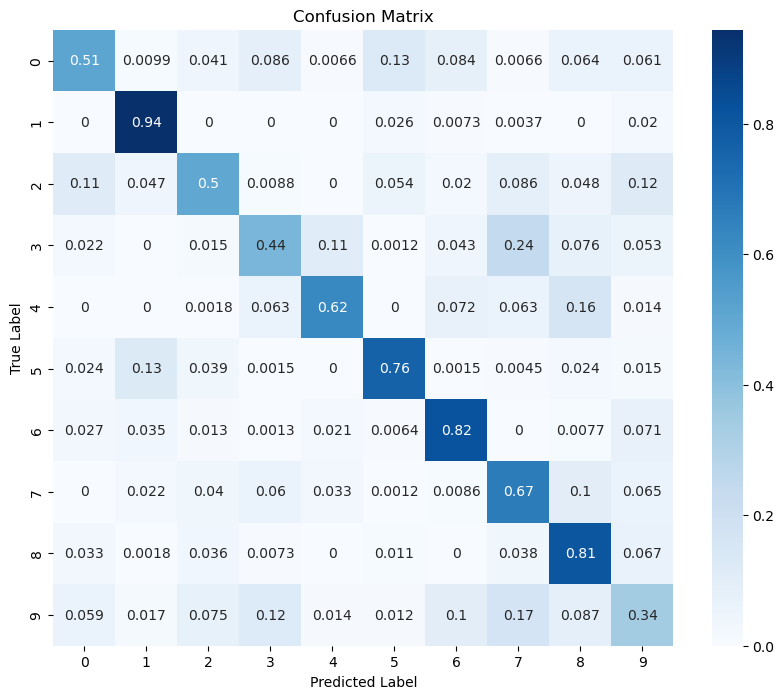

Test Accuracy: 68.27%
Learning rate: 0.0001, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.9493, Train Accuracy: 35.68%, Val Loss: 1.5527, Val Accuracy: 49.73%
Epoch [2/60], Train Loss: 1.4303, Train Accuracy: 51.60%, Val Loss: 1.2922, Val Accuracy: 56.15%
Epoch [3/60], Train Loss: 1.1781, Train Accuracy: 59.34%, Val Loss: 1.0944, Val Accuracy: 59.89%
Epoch [4/60], Train Loss: 0.9673, Train Accuracy: 67.30%, Val Loss: 1.0421, Val Accuracy: 62.30%
Epoch [5/60], Train Loss: 0.8002, Train Accuracy: 73.42%, Val Loss: 0.9709, Val Accuracy: 64.44%
Epoch [6/60], Train Loss: 0.6317, Train Accuracy: 80.18%, Val Loss: 0.9828, Val Accuracy: 64.71%
Epoch [7/60], Train Loss: 0.5226, Train Accuracy: 83.16%, Val Loss: 0.9587, Val Accuracy: 68.72%
Epoch [8/60], Train Loss: 0.4539, Train Accuracy: 85.45%, Val Loss: 0.9904, Val Accuracy: 66.84%
Epoch [9/60], Train Loss: 0.3605, Train Accuracy: 88.95%, Val Loss: 0.9529, Val Accuracy: 68.18%
Epoch [10/60], Train Loss: 0.3235, Train Accuracy: 89.

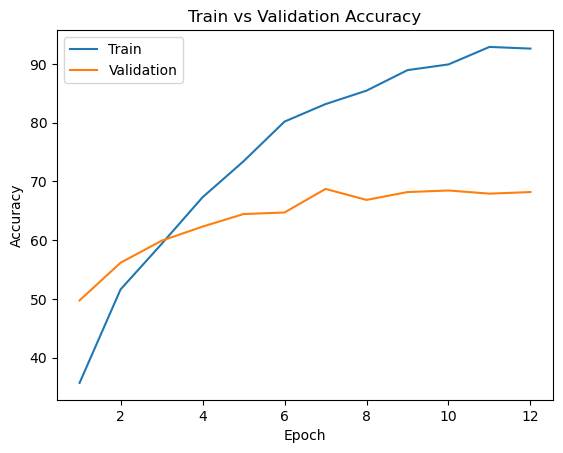

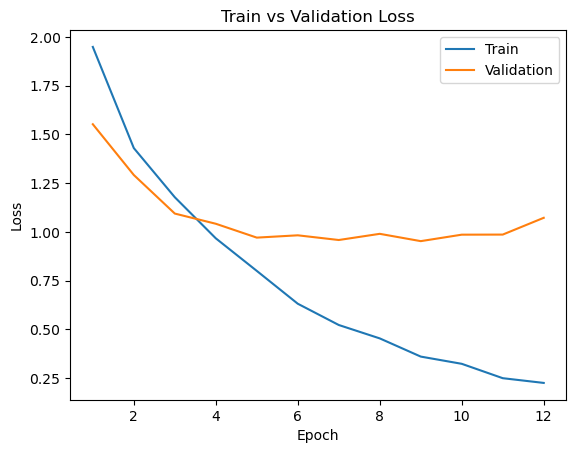

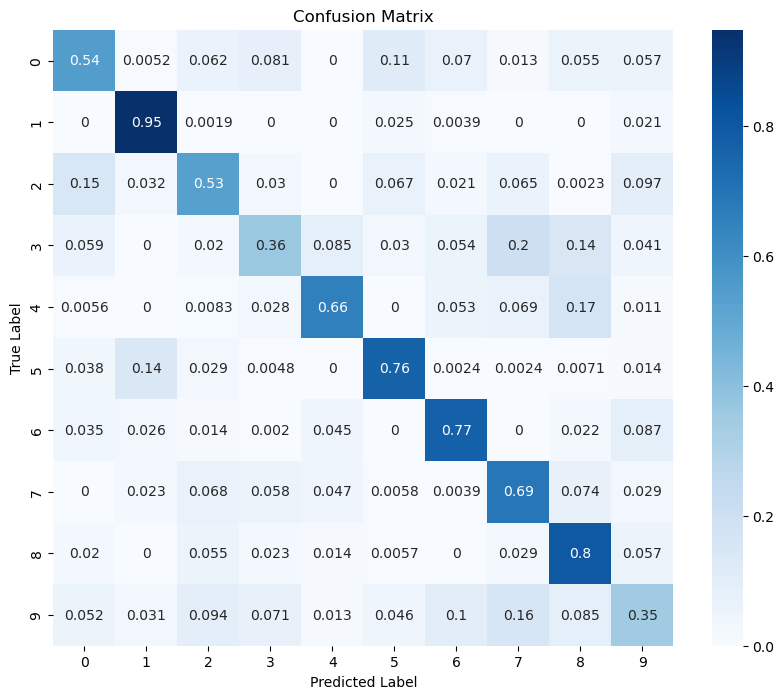

Test Accuracy: 67.20%
Learning rate: 0.0002, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.7634, Train Accuracy: 39.18%, Val Loss: 1.3373, Val Accuracy: 50.27%
Epoch [2/60], Train Loss: 1.2318, Train Accuracy: 55.44%, Val Loss: 1.0871, Val Accuracy: 60.43%
Epoch [3/60], Train Loss: 0.9303, Train Accuracy: 68.16%, Val Loss: 1.1902, Val Accuracy: 60.16%
Epoch [4/60], Train Loss: 0.7279, Train Accuracy: 75.09%, Val Loss: 1.0881, Val Accuracy: 62.03%
Epoch [5/60], Train Loss: 0.6145, Train Accuracy: 78.92%, Val Loss: 0.9111, Val Accuracy: 69.52%
Epoch [6/60], Train Loss: 0.4428, Train Accuracy: 86.37%, Val Loss: 1.0106, Val Accuracy: 70.86%
Epoch [7/60], Train Loss: 0.3585, Train Accuracy: 88.03%, Val Loss: 0.9240, Val Accuracy: 70.05%
Epoch [8/60], Train Loss: 0.2434, Train Accuracy: 92.61%, Val Loss: 1.1614, Val Accuracy: 64.97%
Epoch [9/60], Train Loss: 0.2505, Train Accuracy: 91.87%, Val Loss: 1.0364, Val Accuracy: 68.72%
Epoch [10/60], Train Loss: 0.2238, Train Accuracy: 92.

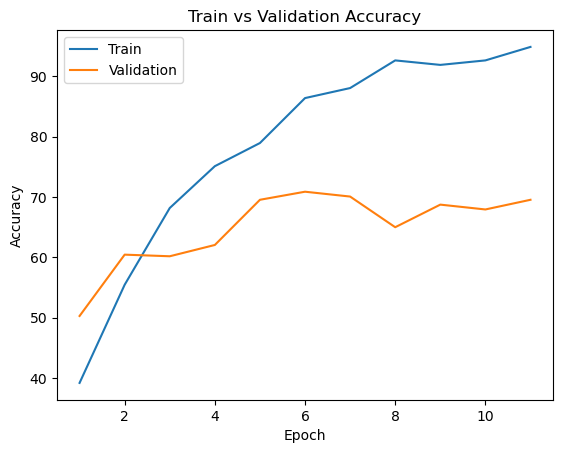

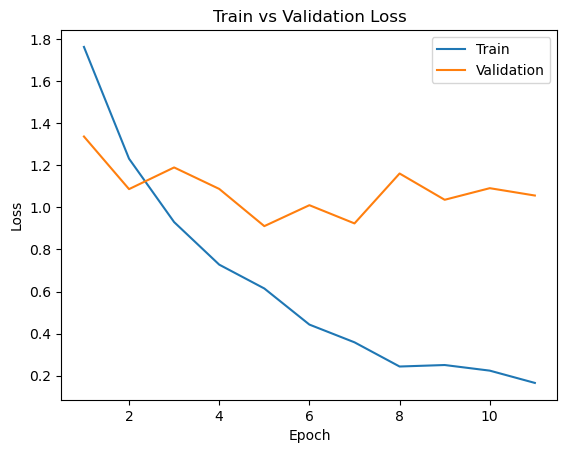

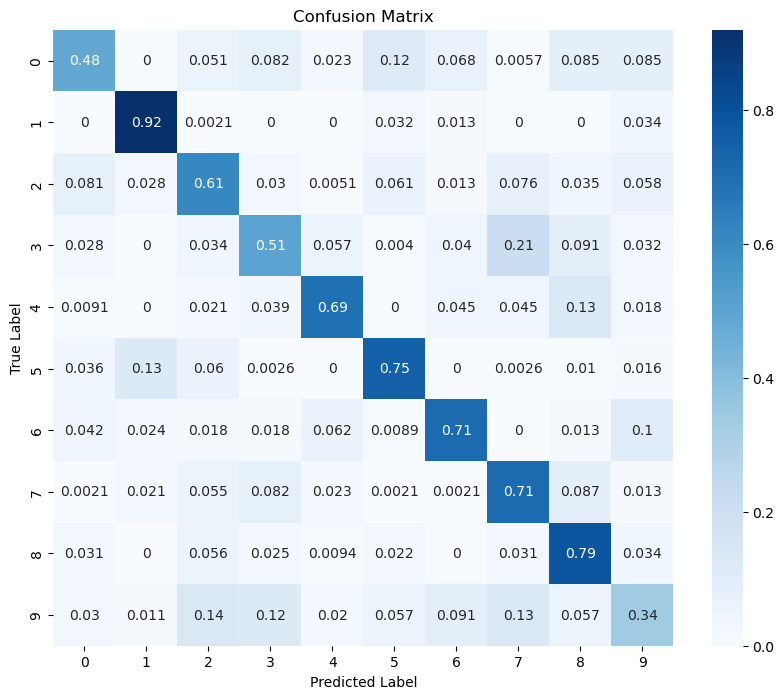

Test Accuracy: 66.93%
Learning rate: 0.0003, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.6912, Train Accuracy: 42.21%, Val Loss: 1.3028, Val Accuracy: 52.41%
Epoch [2/60], Train Loss: 1.1736, Train Accuracy: 57.79%, Val Loss: 1.0555, Val Accuracy: 63.64%
Epoch [3/60], Train Loss: 0.8628, Train Accuracy: 69.30%, Val Loss: 1.0134, Val Accuracy: 62.83%
Epoch [4/60], Train Loss: 0.6716, Train Accuracy: 77.32%, Val Loss: 1.1389, Val Accuracy: 60.70%
Epoch [5/60], Train Loss: 0.6005, Train Accuracy: 80.47%, Val Loss: 1.0219, Val Accuracy: 66.31%
Epoch [6/60], Train Loss: 0.3760, Train Accuracy: 89.12%, Val Loss: 1.0904, Val Accuracy: 67.38%
Epoch [7/60], Train Loss: 0.2921, Train Accuracy: 90.72%, Val Loss: 1.0143, Val Accuracy: 68.98%
Epoch [8/60], Train Loss: 0.2274, Train Accuracy: 92.61%, Val Loss: 1.1769, Val Accuracy: 69.52%
Epoch [9/60], Train Loss: 0.2068, Train Accuracy: 93.70%, Val Loss: 1.1522, Val Accuracy: 67.11%
Epoch [10/60], Train Loss: 0.1798, Train Accuracy: 94.

KeyboardInterrupt: 

In [24]:
root_dir = "."
mfcc_data_dir = os.path.join(root_dir, "datasources", "mfcc")
mfcc_data_handler = DataHandler(mfcc_data_dir, batch_size=32, num_workers=4)
for ss, g in [(10, 0.8)]:
    for lr in [5e-5, 1e-4, 2e-4, 3e-4, 5e-4]:
        num_epochs = 60
        mfcc_cnn = MFCC_Efficientnet_b0()
        print(f"Learning rate: {lr}, Subset size: {ss}, Gamma: {g}")
        best_epoch = training.train(mfcc_cnn, mfcc_data_handler.train_loader, mfcc_data_handler.val_loader, num_epochs, lr, 32, ss, g, patience=5)
        model_path = training.get_model_name(mfcc_cnn.name, 32, lr, best_epoch)
        %matplotlib inline
        plot.plot_training_curve(model_path)
        plot.plot_confusion_matrix(model_path, range(10))
        # test the model
        test_data = mfcc_data_handler.test_loader
        mfcc_cnn.load_state_dict(torch.load(f"./models/{model_path}.pt"))
        training.test_model(mfcc_cnn, test_data)

In [18]:
from torchvision import models
import torch.nn as nn
import torch
# MFCC with efficientnet
class MFCC_Efficientnet_v2(nn.Module):
    def __init__(self, num_classes=10):
        super(MFCC_Efficientnet_v2, self).__init__()
        self.name = "MFCC_Efficientnet_b0"
        self.num_classes = num_classes
        self.efficientnet = models.efficientnet_v2_m(pretrained=True)
        self.efficientnet.classifier[1] = nn.Linear(1280, num_classes)
        
    def forward(self, x):
        return self.efficientnet(x)

c:\Users\Jack\.conda\envs\aps360\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Jack\.conda\envs\aps360\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_M_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_m-dc08266a.pth" to C:\Users\Jack/.cache\torch\hub\checkpoints\efficientnet_v2_m-dc08266a.pth
100.0%


Learning rate: 5e-05, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.8712, Train Accuracy: 33.73%, Val Loss: 1.5090, Val Accuracy: 46.52%
Epoch [2/60], Train Loss: 1.3728, Train Accuracy: 51.72%, Val Loss: 1.3019, Val Accuracy: 52.14%
Epoch [3/60], Train Loss: 1.1701, Train Accuracy: 59.74%, Val Loss: 1.1075, Val Accuracy: 60.70%
Epoch [4/60], Train Loss: 0.9122, Train Accuracy: 69.07%, Val Loss: 1.0185, Val Accuracy: 67.11%
Epoch [5/60], Train Loss: 0.7125, Train Accuracy: 75.95%, Val Loss: 1.0089, Val Accuracy: 68.98%
Epoch [6/60], Train Loss: 0.5255, Train Accuracy: 82.36%, Val Loss: 1.1180, Val Accuracy: 64.44%
Epoch [7/60], Train Loss: 0.3766, Train Accuracy: 87.51%, Val Loss: 1.0925, Val Accuracy: 67.38%
Epoch [8/60], Train Loss: 0.2910, Train Accuracy: 90.09%, Val Loss: 1.0433, Val Accuracy: 70.59%
Epoch [9/60], Train Loss: 0.2140, Train Accuracy: 93.59%, Val Loss: 1.0751, Val Accuracy: 68.45%
Epoch [10/60], Train Loss: 0.1686, Train Accuracy: 94.56%, Val Loss: 0.9803, 

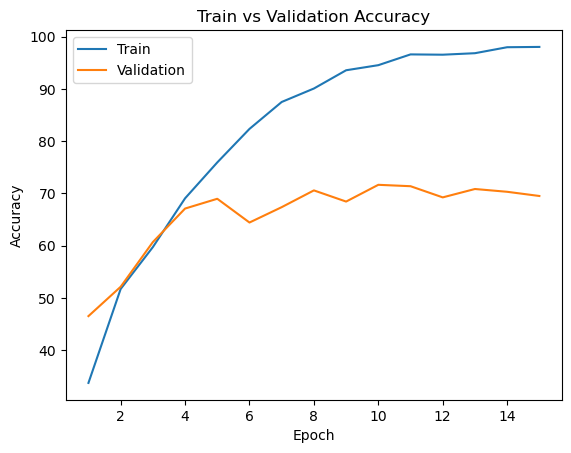

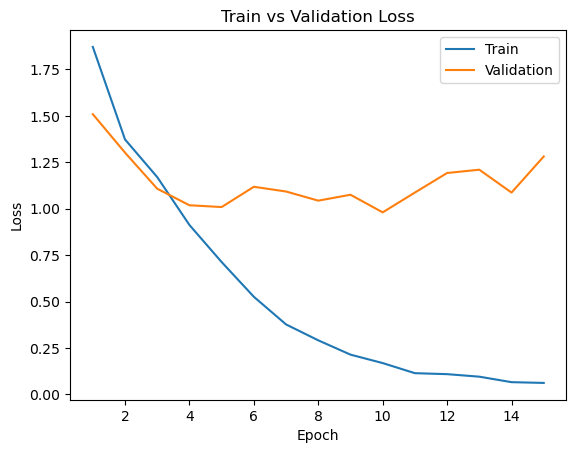

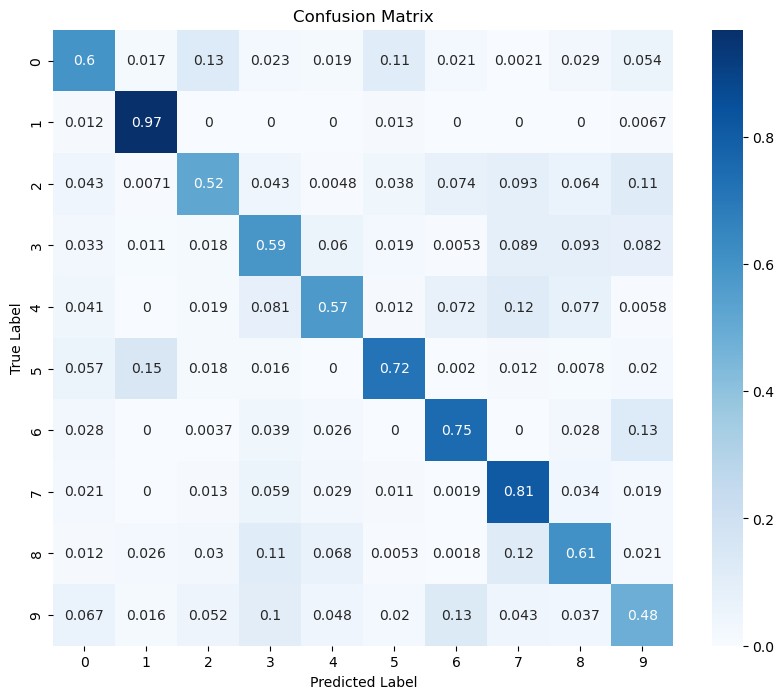

Test Accuracy: 73.60%
Learning rate: 0.0001, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.7760, Train Accuracy: 36.14%, Val Loss: 1.3608, Val Accuracy: 57.22%
Epoch [2/60], Train Loss: 1.3306, Train Accuracy: 53.44%, Val Loss: 1.1781, Val Accuracy: 59.63%
Epoch [3/60], Train Loss: 1.0326, Train Accuracy: 64.83%, Val Loss: 1.0123, Val Accuracy: 66.84%
Epoch [4/60], Train Loss: 0.7632, Train Accuracy: 74.46%, Val Loss: 1.0006, Val Accuracy: 67.65%
Epoch [5/60], Train Loss: 0.5393, Train Accuracy: 82.13%, Val Loss: 1.1224, Val Accuracy: 63.64%
Epoch [6/60], Train Loss: 0.4124, Train Accuracy: 86.25%, Val Loss: 1.1757, Val Accuracy: 67.65%
Epoch [7/60], Train Loss: 0.2787, Train Accuracy: 90.84%, Val Loss: 0.9306, Val Accuracy: 71.93%
Epoch [8/60], Train Loss: 0.1990, Train Accuracy: 93.70%, Val Loss: 1.1826, Val Accuracy: 66.58%
Epoch [9/60], Train Loss: 0.1705, Train Accuracy: 94.90%, Val Loss: 1.1164, Val Accuracy: 71.39%
Epoch [10/60], Train Loss: 0.2561, Train Accuracy: 91.

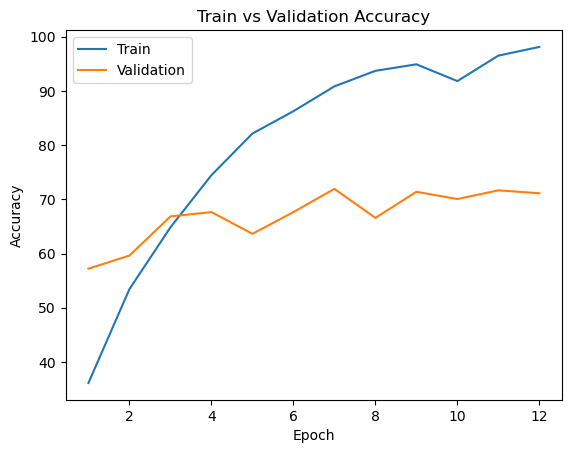

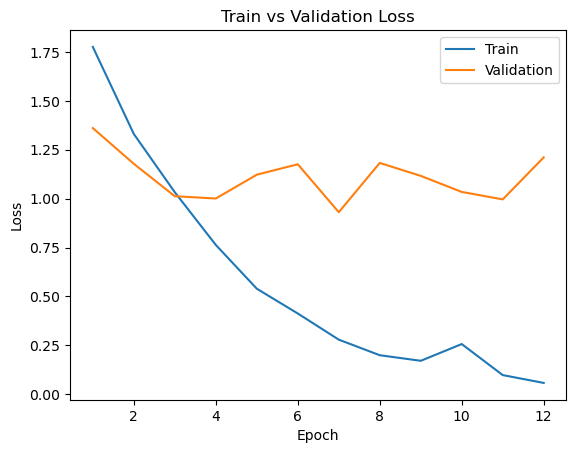

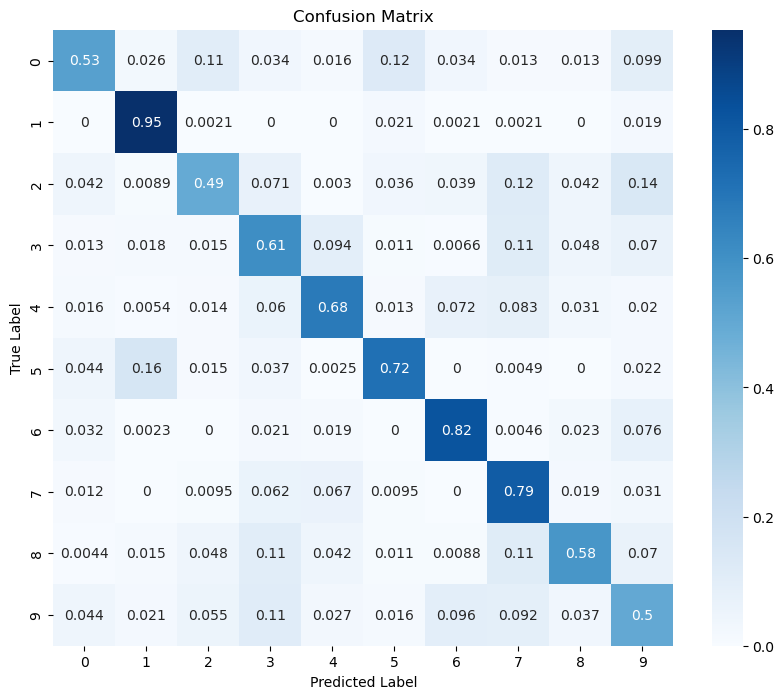

Test Accuracy: 70.93%
Learning rate: 0.0002, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.8509, Train Accuracy: 34.54%, Val Loss: 1.4384, Val Accuracy: 47.86%
Epoch [2/60], Train Loss: 1.4823, Train Accuracy: 48.68%, Val Loss: 1.3377, Val Accuracy: 52.94%
Epoch [3/60], Train Loss: 1.1983, Train Accuracy: 59.34%, Val Loss: 1.0971, Val Accuracy: 60.70%
Epoch [4/60], Train Loss: 1.0073, Train Accuracy: 65.18%, Val Loss: 1.0857, Val Accuracy: 63.64%
Epoch [5/60], Train Loss: 0.7849, Train Accuracy: 73.20%, Val Loss: 1.0836, Val Accuracy: 65.51%
Epoch [6/60], Train Loss: 0.5848, Train Accuracy: 80.07%, Val Loss: 1.1630, Val Accuracy: 65.51%
Epoch [7/60], Train Loss: 0.4187, Train Accuracy: 85.91%, Val Loss: 1.1540, Val Accuracy: 66.04%
Epoch [8/60], Train Loss: 0.3317, Train Accuracy: 88.77%, Val Loss: 1.3101, Val Accuracy: 64.17%
Epoch [9/60], Train Loss: 0.2402, Train Accuracy: 92.04%, Val Loss: 1.1792, Val Accuracy: 70.05%
Epoch [10/60], Train Loss: 0.2029, Train Accuracy: 93.

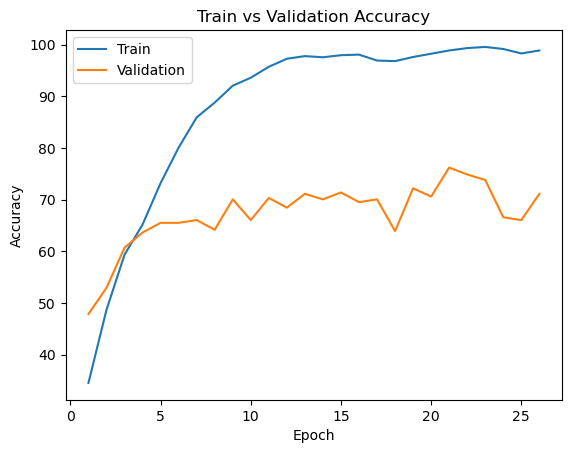

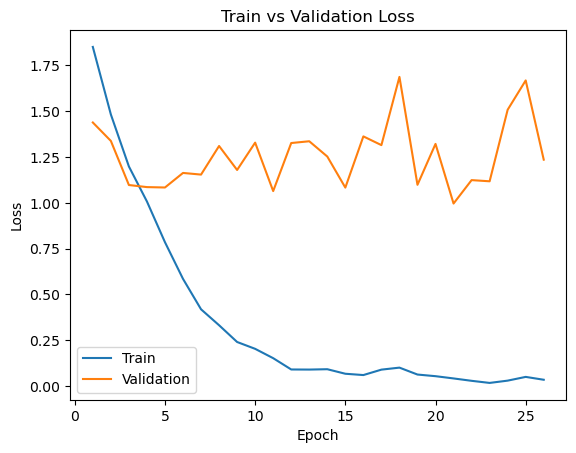

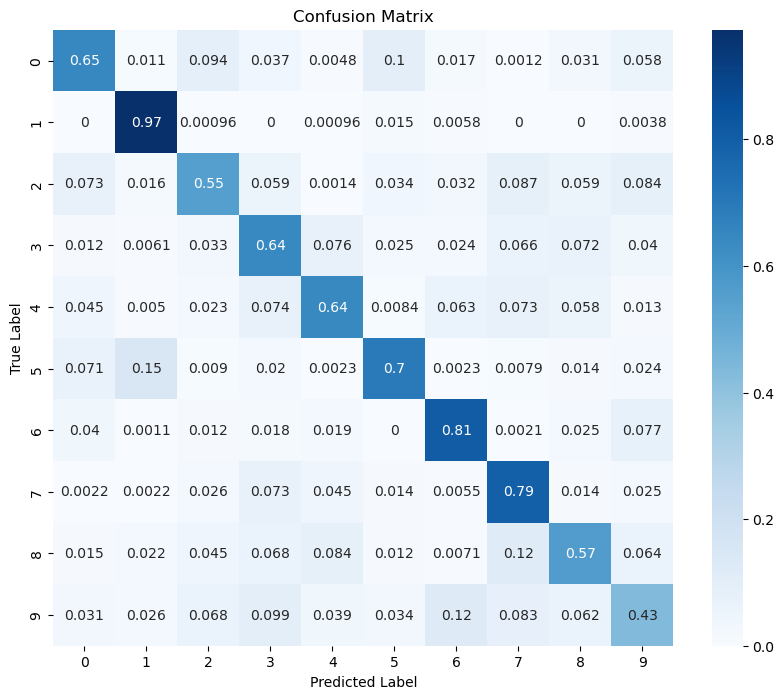

Test Accuracy: 76.00%
Learning rate: 0.0003, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.8654, Train Accuracy: 33.22%, Val Loss: 1.6552, Val Accuracy: 37.70%
Epoch [2/60], Train Loss: 1.5395, Train Accuracy: 46.56%, Val Loss: 1.8338, Val Accuracy: 36.36%
Epoch [3/60], Train Loss: 1.3708, Train Accuracy: 52.75%, Val Loss: 1.3839, Val Accuracy: 53.21%
Epoch [4/60], Train Loss: 1.1394, Train Accuracy: 61.23%, Val Loss: 1.2407, Val Accuracy: 55.88%
Epoch [5/60], Train Loss: 0.9712, Train Accuracy: 65.92%, Val Loss: 1.3165, Val Accuracy: 56.15%
Epoch [6/60], Train Loss: 0.8197, Train Accuracy: 71.53%, Val Loss: 1.1399, Val Accuracy: 61.23%
Epoch [7/60], Train Loss: 0.6372, Train Accuracy: 78.41%, Val Loss: 1.0685, Val Accuracy: 65.78%
Epoch [8/60], Train Loss: 0.4902, Train Accuracy: 83.33%, Val Loss: 1.0249, Val Accuracy: 71.93%
Epoch [9/60], Train Loss: 0.3664, Train Accuracy: 86.08%, Val Loss: 1.2979, Val Accuracy: 63.37%
Epoch [10/60], Train Loss: 0.3662, Train Accuracy: 87.

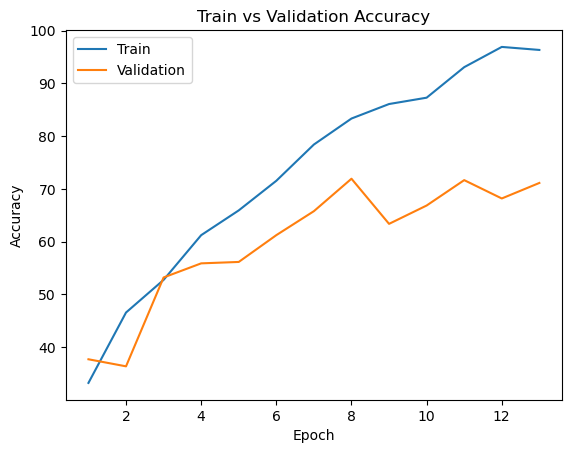

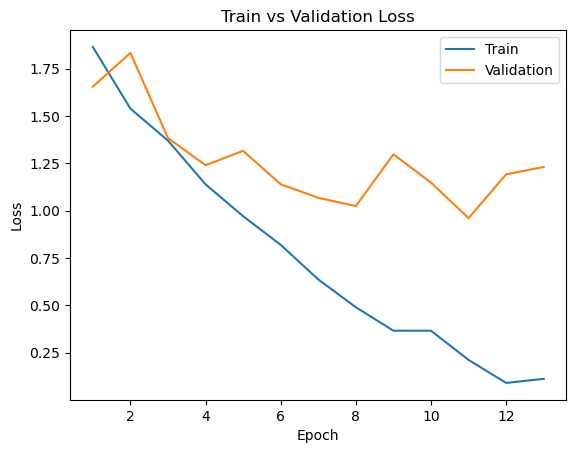

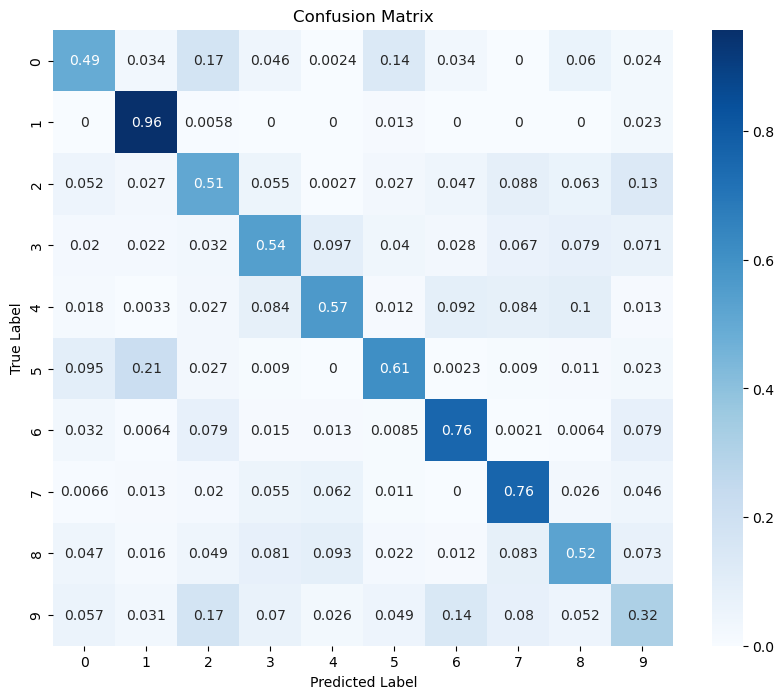

Test Accuracy: 69.07%
Learning rate: 0.0005, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.9507, Train Accuracy: 30.58%, Val Loss: 1.7933, Val Accuracy: 39.30%
Epoch [2/60], Train Loss: 1.6600, Train Accuracy: 41.07%, Val Loss: 1.8202, Val Accuracy: 36.10%
Epoch [3/60], Train Loss: 1.5081, Train Accuracy: 48.45%, Val Loss: 1.2741, Val Accuracy: 52.14%
Epoch [4/60], Train Loss: 1.3099, Train Accuracy: 53.84%, Val Loss: 1.3622, Val Accuracy: 54.01%
Epoch [5/60], Train Loss: 1.1750, Train Accuracy: 60.31%, Val Loss: 1.2564, Val Accuracy: 54.55%
Epoch [6/60], Train Loss: 1.0179, Train Accuracy: 64.03%, Val Loss: 1.3393, Val Accuracy: 54.81%
Epoch [7/60], Train Loss: 0.9272, Train Accuracy: 68.16%, Val Loss: 1.0954, Val Accuracy: 61.23%
Epoch [8/60], Train Loss: 0.7551, Train Accuracy: 73.88%, Val Loss: 1.3466, Val Accuracy: 55.88%
Epoch [9/60], Train Loss: 0.6502, Train Accuracy: 77.84%, Val Loss: 1.4403, Val Accuracy: 56.68%
Epoch [10/60], Train Loss: 0.5425, Train Accuracy: 82.

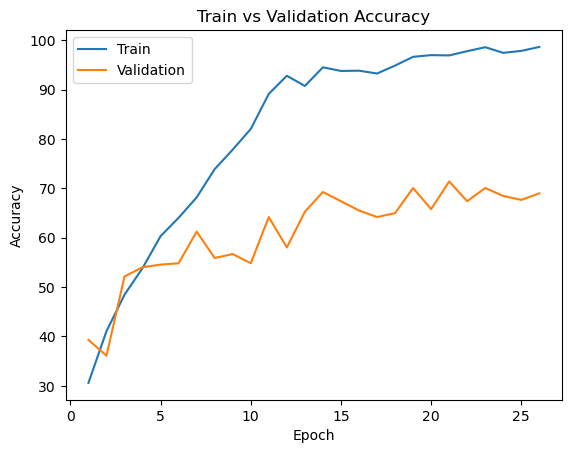

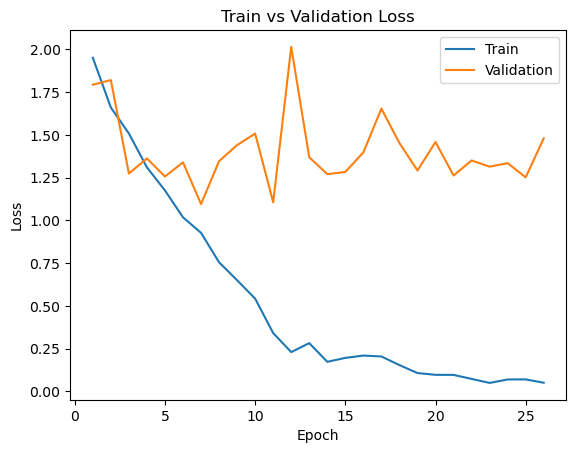

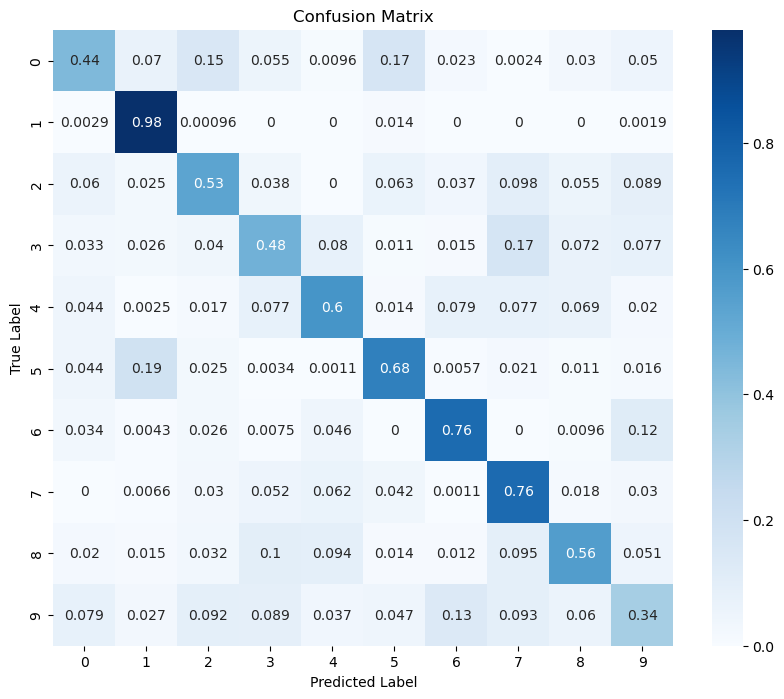

Test Accuracy: 73.07%


In [19]:
torch.cuda.empty_cache()

root_dir = "."
mfcc_data_dir = os.path.join(root_dir, "datasources", "mfcc")
mfcc_data_handler = DataHandler(mfcc_data_dir, batch_size=8, num_workers=4)
for ss, g in [(10, 0.8)]:
    for lr in [5e-5, 1e-4, 2e-4, 3e-4, 5e-4]:
        num_epochs = 60
        mfcc_cnn = MFCC_Efficientnet_v2()
        print(f"Learning rate: {lr}, Subset size: {ss}, Gamma: {g}")
        best_epoch = training.train(mfcc_cnn, mfcc_data_handler.train_loader, mfcc_data_handler.val_loader, num_epochs, lr, 32, ss, g, patience=5)
        model_path = training.get_model_name(mfcc_cnn.name, 32, lr, best_epoch)
        %matplotlib inline
        plot.plot_training_curve(model_path)
        plot.plot_confusion_matrix(model_path, range(10))
        # test the model
        test_data = mfcc_data_handler.test_loader
        mfcc_cnn.load_state_dict(torch.load(f"./models/{model_path}.pt"))
        training.test_model(mfcc_cnn, test_data)

In [28]:
from torchvision import models
import torch.nn as nn
import torch

class MFCC_Resnet_34(nn.Module):
    def __init__(self, num_classes=10):
        super(MFCC_Resnet_34, self).__init__()
        self.name = "MFCC_Resnet_34"
        self.num_classes = num_classes
        self.resnet = models.resnet34(pretrained=True)
        self.resnet.fc = nn.Linear(512, num_classes)
        
    def forward(self, x):
        return self.resnet(x)

class MFCC_Resnet_50(nn.Module):
    def __init__(self, num_classes=10):
        super(MFCC_Resnet_50, self).__init__()
        self.name = "MFCC_Resnet_50"
        self.num_classes = num_classes
        self.resnet = models.resnet50(pretrained=True)
        self.resnet.fc = nn.Linear(2048, num_classes)
        
    def forward(self, x):
        return self.resnet(x)

Learning rate: 5e-05, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.5557, Train Accuracy: 45.93%, Val Loss: 1.1047, Val Accuracy: 63.64%
Epoch [2/60], Train Loss: 0.8976, Train Accuracy: 70.22%, Val Loss: 0.9848, Val Accuracy: 62.30%
Epoch [3/60], Train Loss: 0.5624, Train Accuracy: 82.65%, Val Loss: 0.9244, Val Accuracy: 68.18%
Epoch [4/60], Train Loss: 0.3221, Train Accuracy: 91.58%, Val Loss: 0.9256, Val Accuracy: 70.86%
Epoch [5/60], Train Loss: 0.2114, Train Accuracy: 94.62%, Val Loss: 1.0047, Val Accuracy: 70.86%
Epoch [6/60], Train Loss: 0.1275, Train Accuracy: 97.14%, Val Loss: 0.8488, Val Accuracy: 74.33%
Epoch [7/60], Train Loss: 0.0523, Train Accuracy: 99.60%, Val Loss: 0.8466, Val Accuracy: 74.06%
Epoch [8/60], Train Loss: 0.0536, Train Accuracy: 99.03%, Val Loss: 0.8781, Val Accuracy: 73.80%
Epoch [9/60], Train Loss: 0.0775, Train Accuracy: 98.05%, Val Loss: 1.0149, Val Accuracy: 67.91%
Epoch [10/60], Train Loss: 0.0377, Train Accuracy: 99.54%, Val Loss: 0.9448, 

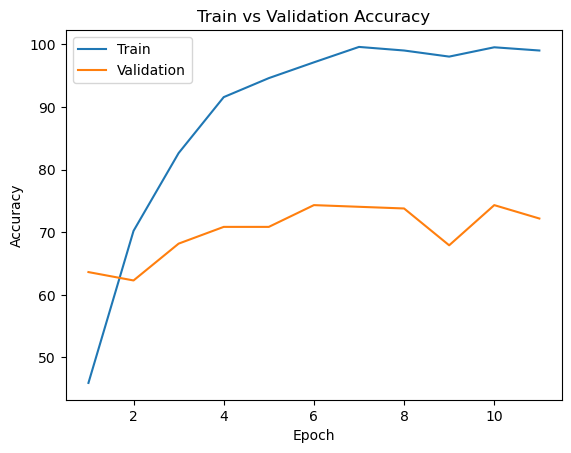

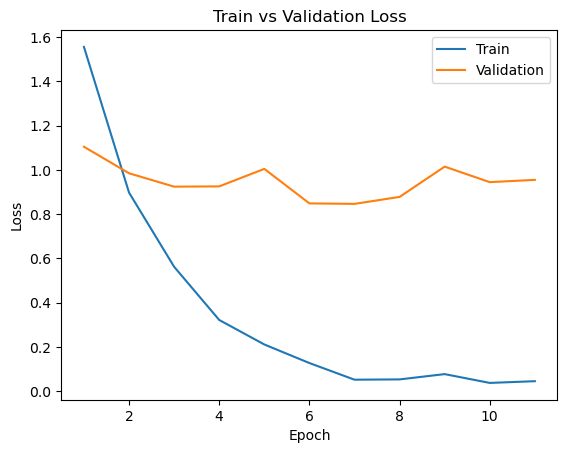

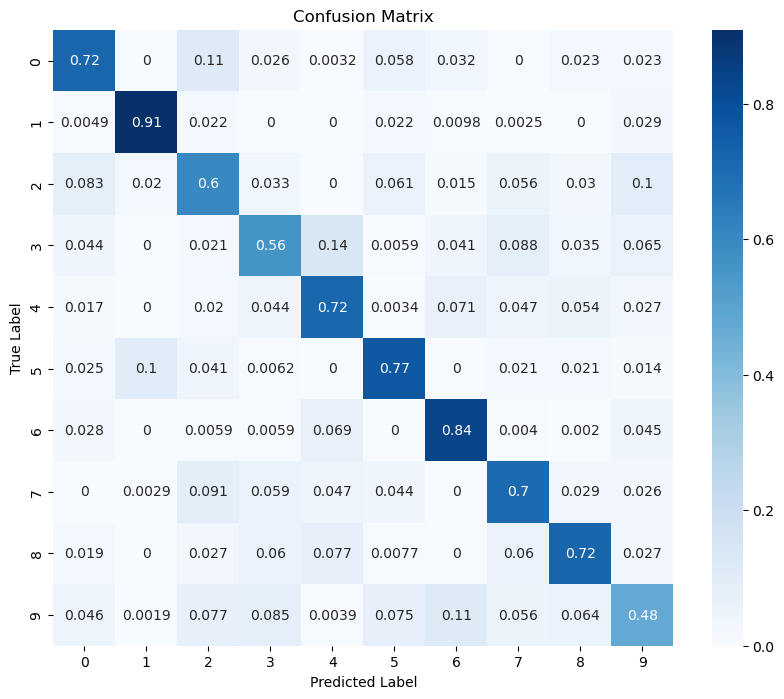

Test Accuracy: 70.93%
Learning rate: 0.0001, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.4955, Train Accuracy: 48.05%, Val Loss: 1.2683, Val Accuracy: 52.41%
Epoch [2/60], Train Loss: 0.9580, Train Accuracy: 66.09%, Val Loss: 1.0959, Val Accuracy: 55.88%
Epoch [3/60], Train Loss: 0.6792, Train Accuracy: 76.75%, Val Loss: 1.0377, Val Accuracy: 68.45%
Epoch [4/60], Train Loss: 0.4304, Train Accuracy: 86.43%, Val Loss: 1.0927, Val Accuracy: 66.04%
Epoch [5/60], Train Loss: 0.3009, Train Accuracy: 90.44%, Val Loss: 1.1597, Val Accuracy: 66.58%
Epoch [6/60], Train Loss: 0.1817, Train Accuracy: 94.50%, Val Loss: 1.0759, Val Accuracy: 68.18%
Epoch [7/60], Train Loss: 0.1076, Train Accuracy: 97.25%, Val Loss: 0.9310, Val Accuracy: 72.19%
Epoch [8/60], Train Loss: 0.0624, Train Accuracy: 98.34%, Val Loss: 0.9939, Val Accuracy: 74.33%
Epoch [9/60], Train Loss: 0.0774, Train Accuracy: 97.88%, Val Loss: 0.9770, Val Accuracy: 72.73%
Epoch [10/60], Train Loss: 0.0896, Train Accuracy: 97.

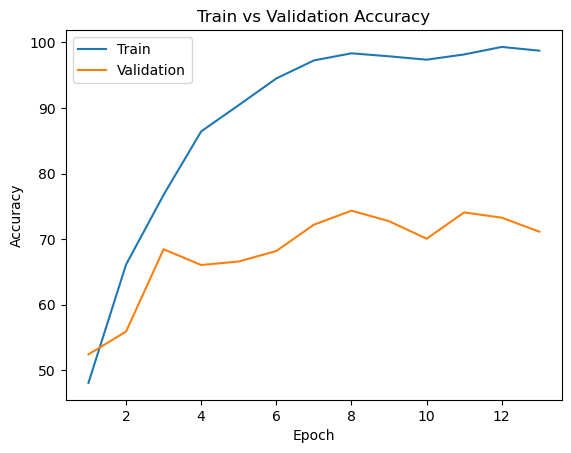

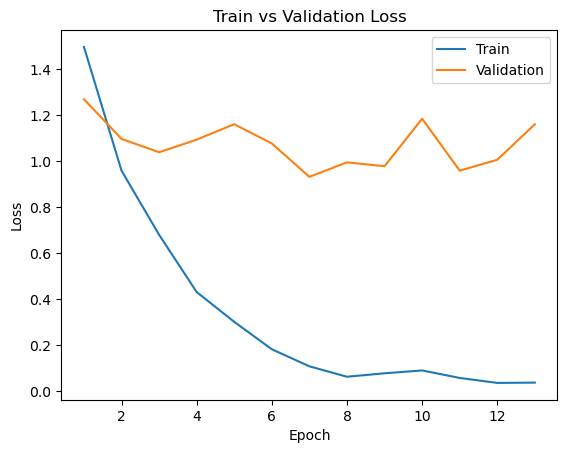

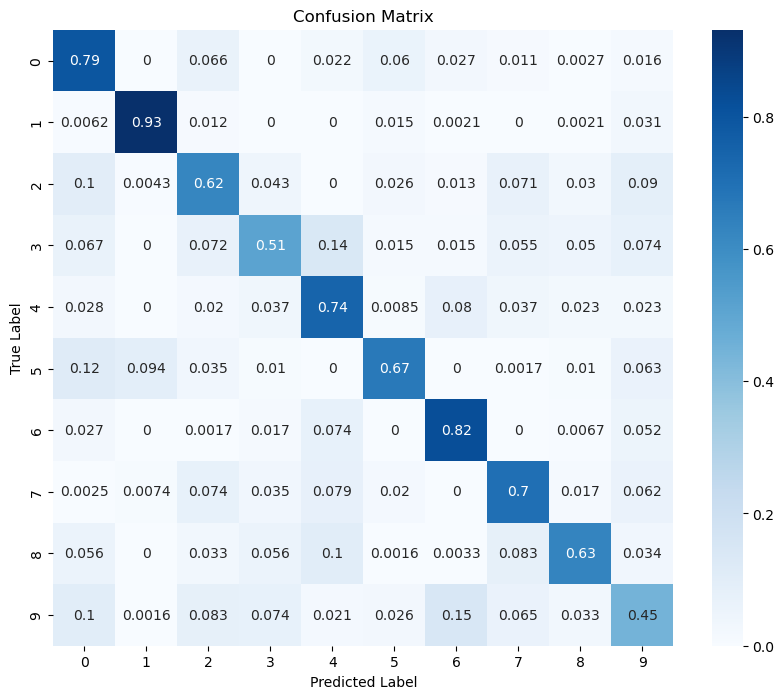

Test Accuracy: 67.20%
Learning rate: 0.0002, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.5129, Train Accuracy: 46.68%, Val Loss: 1.4240, Val Accuracy: 52.67%
Epoch [2/60], Train Loss: 1.0721, Train Accuracy: 60.19%, Val Loss: 1.0631, Val Accuracy: 61.23%
Epoch [3/60], Train Loss: 0.7642, Train Accuracy: 73.54%, Val Loss: 1.3419, Val Accuracy: 54.01%
Epoch [4/60], Train Loss: 0.6015, Train Accuracy: 79.50%, Val Loss: 1.2889, Val Accuracy: 59.63%
Epoch [5/60], Train Loss: 0.4625, Train Accuracy: 84.88%, Val Loss: 1.3361, Val Accuracy: 59.89%
Epoch [6/60], Train Loss: 0.2760, Train Accuracy: 90.72%, Val Loss: 1.2065, Val Accuracy: 64.44%
Epoch [7/60], Train Loss: 0.1713, Train Accuracy: 94.27%, Val Loss: 1.0643, Val Accuracy: 68.72%
Epoch [8/60], Train Loss: 0.1361, Train Accuracy: 95.30%, Val Loss: 1.4795, Val Accuracy: 64.71%
Epoch [9/60], Train Loss: 0.1442, Train Accuracy: 95.30%, Val Loss: 1.1853, Val Accuracy: 70.59%
Epoch [10/60], Train Loss: 0.1613, Train Accuracy: 94.

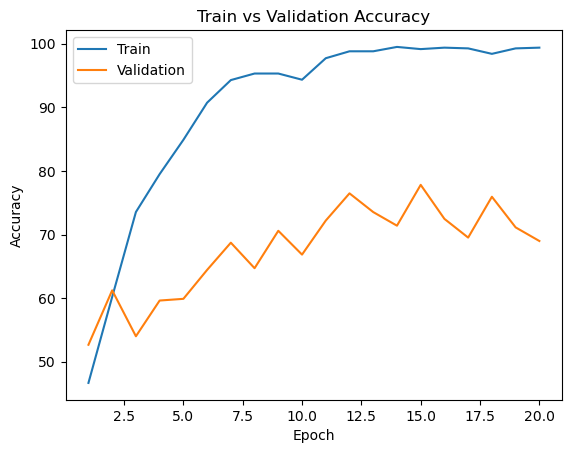

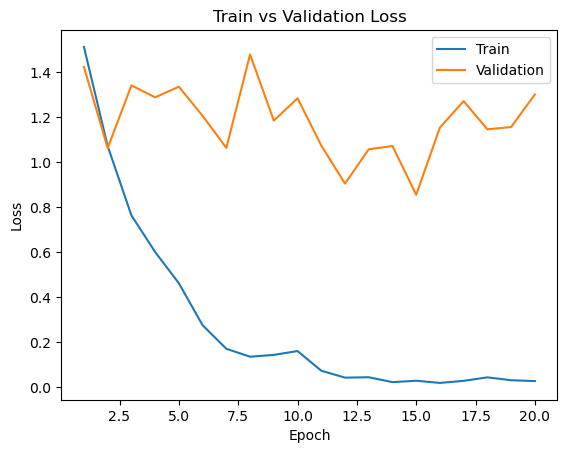

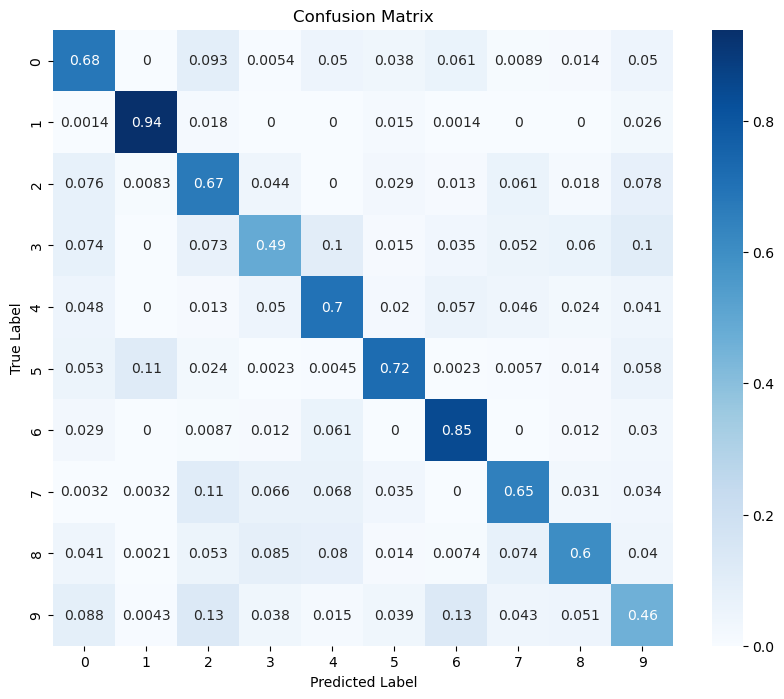

Test Accuracy: 72.53%
Learning rate: 0.0003, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.6203, Train Accuracy: 42.61%, Val Loss: 1.5748, Val Accuracy: 45.72%
Epoch [2/60], Train Loss: 1.1522, Train Accuracy: 59.22%, Val Loss: 1.1974, Val Accuracy: 57.75%
Epoch [3/60], Train Loss: 0.9701, Train Accuracy: 66.04%, Val Loss: 1.1414, Val Accuracy: 62.30%
Epoch [4/60], Train Loss: 0.7976, Train Accuracy: 72.85%, Val Loss: 1.4777, Val Accuracy: 56.68%
Epoch [5/60], Train Loss: 0.5611, Train Accuracy: 80.13%, Val Loss: 1.1518, Val Accuracy: 64.71%
Epoch [6/60], Train Loss: 0.4763, Train Accuracy: 83.79%, Val Loss: 1.1430, Val Accuracy: 65.51%
Epoch [7/60], Train Loss: 0.3120, Train Accuracy: 90.44%, Val Loss: 1.2503, Val Accuracy: 65.78%
Epoch [8/60], Train Loss: 0.2931, Train Accuracy: 89.81%, Val Loss: 1.0886, Val Accuracy: 68.18%
Epoch [9/60], Train Loss: 0.1894, Train Accuracy: 93.47%, Val Loss: 1.1358, Val Accuracy: 68.45%
Epoch [10/60], Train Loss: 0.1678, Train Accuracy: 94.

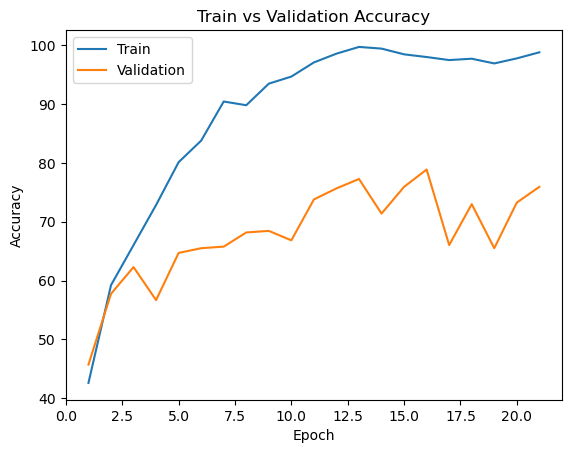

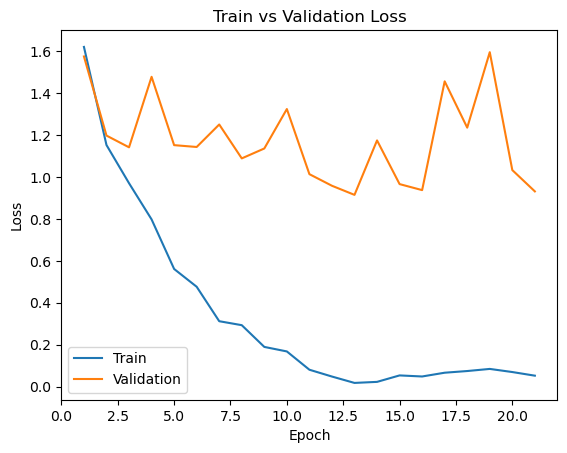

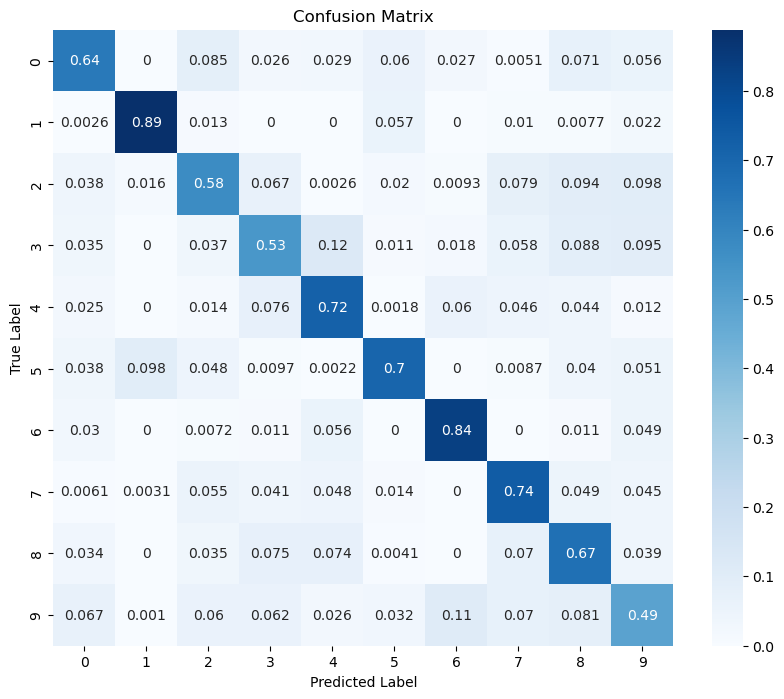

Test Accuracy: 68.27%
Learning rate: 0.0005, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.6547, Train Accuracy: 40.15%, Val Loss: 1.8905, Val Accuracy: 34.22%
Epoch [2/60], Train Loss: 1.3645, Train Accuracy: 50.92%, Val Loss: 1.2691, Val Accuracy: 51.87%
Epoch [3/60], Train Loss: 1.1003, Train Accuracy: 60.31%, Val Loss: 1.1841, Val Accuracy: 59.36%
Epoch [4/60], Train Loss: 0.9252, Train Accuracy: 67.81%, Val Loss: 1.5466, Val Accuracy: 49.73%
Epoch [5/60], Train Loss: 0.7619, Train Accuracy: 73.14%, Val Loss: 1.5586, Val Accuracy: 53.48%
Epoch [6/60], Train Loss: 0.6721, Train Accuracy: 77.66%, Val Loss: 1.2255, Val Accuracy: 60.43%
Epoch [7/60], Train Loss: 0.5072, Train Accuracy: 83.16%, Val Loss: 1.1597, Val Accuracy: 65.24%
Epoch [8/60], Train Loss: 0.3607, Train Accuracy: 88.20%, Val Loss: 1.3794, Val Accuracy: 59.09%
Epoch [9/60], Train Loss: 0.3641, Train Accuracy: 88.20%, Val Loss: 1.2881, Val Accuracy: 67.38%
Epoch [10/60], Train Loss: 0.2807, Train Accuracy: 90.

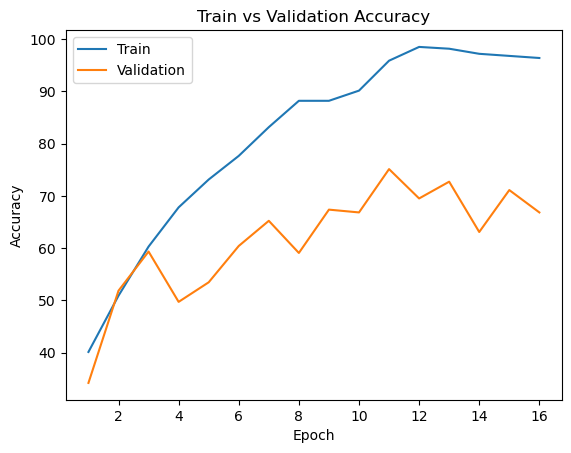

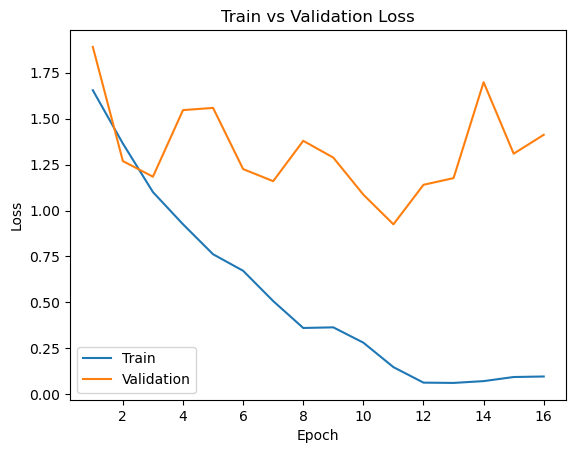

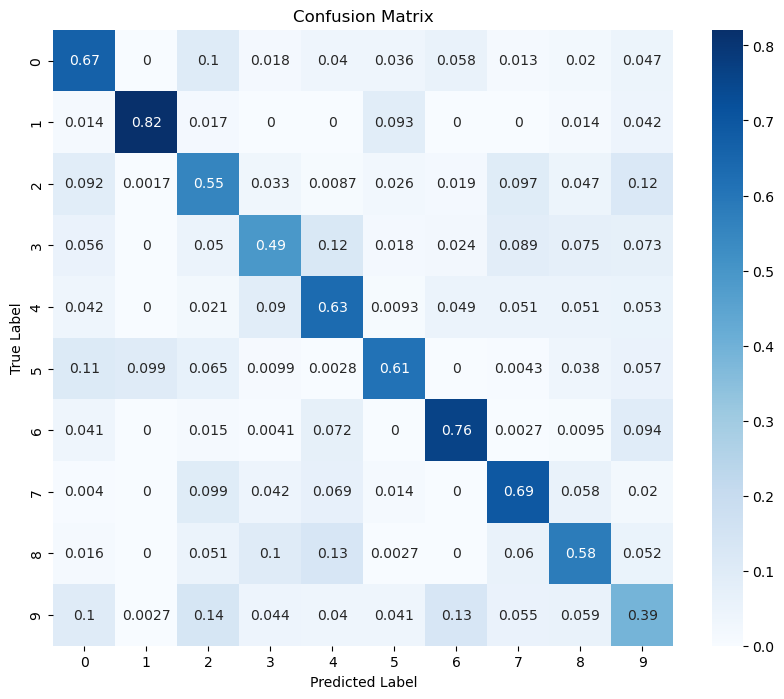

Test Accuracy: 71.20%


In [29]:
root_dir = "."
mfcc_data_dir = os.path.join(root_dir, "datasources", "mfcc")
mfcc_data_handler = DataHandler(mfcc_data_dir, batch_size=32, num_workers=4)
for ss, g in [(10, 0.8)]:
    for lr in [5e-5, 1e-4, 2e-4, 3e-4, 5e-4]:
        num_epochs = 60
        mfcc_cnn = MFCC_Resnet_34()
        print(f"Learning rate: {lr}, Subset size: {ss}, Gamma: {g}")
        best_epoch = training.train(mfcc_cnn, mfcc_data_handler.train_loader, mfcc_data_handler.val_loader, num_epochs, lr, 32, ss, g, patience=5)
        model_path = training.get_model_name(mfcc_cnn.name, 32, lr, best_epoch)
        %matplotlib inline
        plot.plot_training_curve(model_path)
        plot.plot_confusion_matrix(model_path, range(10))
        # test the model
        test_data = mfcc_data_handler.test_loader
        mfcc_cnn.load_state_dict(torch.load(f"./models/{model_path}.pt"))
        training.test_model(mfcc_cnn, test_data)

In [30]:
root_dir = "."
mfcc_data_dir = os.path.join(root_dir, "datasources", "mfcc")
mfcc_data_handler = DataHandler(mfcc_data_dir, batch_size=32, num_workers=4)
for ss, g in [(10, 0.8)]:
    for lr in [5e-5, 1e-4, 2e-4, 3e-4, 5e-4]:
        num_epochs = 60
        mfcc_cnn = MFCC_Resnet_50()
        print(f"Learning rate: {lr}, Subset size: {ss}, Gamma: {g}")
        best_epoch = training.train(mfcc_cnn, mfcc_data_handler.train_loader, mfcc_data_handler.val_loader, num_epochs, lr, 32, ss, g, patience=5)
        model_path = training.get_model_name(mfcc_cnn.name, 32, lr, best_epoch)
        %matplotlib inline
        plot.plot_training_curve(model_path)
        plot.plot_confusion_matrix(model_path, range(10))
        # test the model
        test_data = mfcc_data_handler.test_loader
        mfcc_cnn.load_state_dict(torch.load(f"./models/{model_path}.pt"))
        training.test_model(mfcc_cnn, test_data)

c:\Users\Jack\.conda\envs\aps360\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Learning rate: 5e-05, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.6541, Train Accuracy: 43.70%, Val Loss: 1.3791, Val Accuracy: 53.21%
Epoch [2/60], Train Loss: 1.0464, Train Accuracy: 63.46%, Val Loss: 1.1556, Val Accuracy: 59.36%
Epoch [3/60], Train Loss: 0.6644, Train Accuracy: 78.64%, Val Loss: 1.1449, Val Accuracy: 63.10%
Epoch [4/60], Train Loss: 0.4252, Train Accuracy: 86.54%, Val Loss: 1.0028, Val Accuracy: 65.51%


KeyboardInterrupt: 

In [31]:
# mfcc model using resnet pretrained
from torchvision import models
import torch.nn as nn
import torch

class MFCC_Resnet_not_pretrained(nn.Module):
    def __init__(self, num_classes=10):
        super(MFCC_Resnet_not_pretrained, self).__init__()
        self.name = "MFCC_Resnet18_non_pretrained"
        self.num_classes = num_classes
        self.resnet = models.resnet18(pretrained=False)
        self.resnet.fc = nn.Linear(512, num_classes)
        
    def forward(self, x):
        return self.resnet(x)


c:\Users\Jack\.conda\envs\aps360\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Learning rate: 5e-05, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.8206, Train Accuracy: 34.36%, Val Loss: 1.6444, Val Accuracy: 38.24%
Epoch [2/60], Train Loss: 1.4583, Train Accuracy: 47.48%, Val Loss: 1.5027, Val Accuracy: 41.98%
Epoch [3/60], Train Loss: 1.3269, Train Accuracy: 51.60%, Val Loss: 1.4184, Val Accuracy: 48.93%
Epoch [4/60], Train Loss: 1.2024, Train Accuracy: 56.36%, Val Loss: 1.4065, Val Accuracy: 51.34%
Epoch [5/60], Train Loss: 1.0630, Train Accuracy: 63.00%, Val Loss: 1.2282, Val Accuracy: 55.35%
Epoch [6/60], Train Loss: 0.9176, Train Accuracy: 67.24%, Val Loss: 1.3018, Val Accuracy: 54.01%
Epoch [7/60], Train Loss: 0.8096, Train Accuracy: 72.91%, Val Loss: 1.2142, Val Accuracy: 57.49%
Epoch [8/60], Train Loss: 0.6582, Train Accuracy: 79.61%, Val Loss: 1.3522, Val Accuracy: 55.35%
Epoch [9/60], Train Loss: 0.5397, Train Accuracy: 83.96%, Val Loss: 1.2357, Val Accuracy: 58.29%
Epoch [10/60], Train Loss: 0.3813, Train Accuracy: 89.52%, Val Loss: 1.1427, 

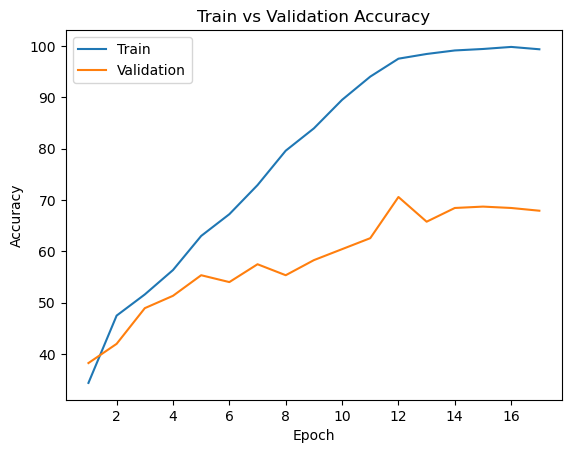

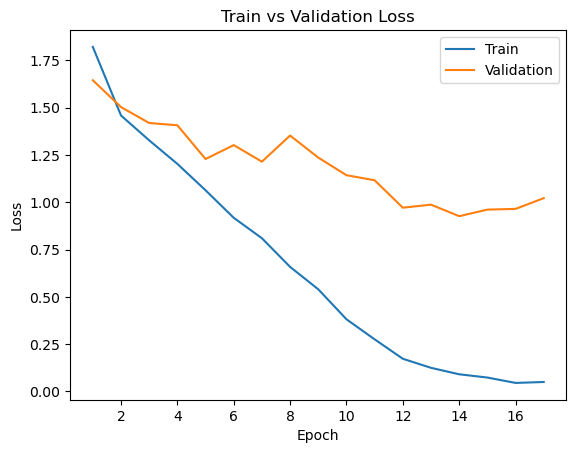

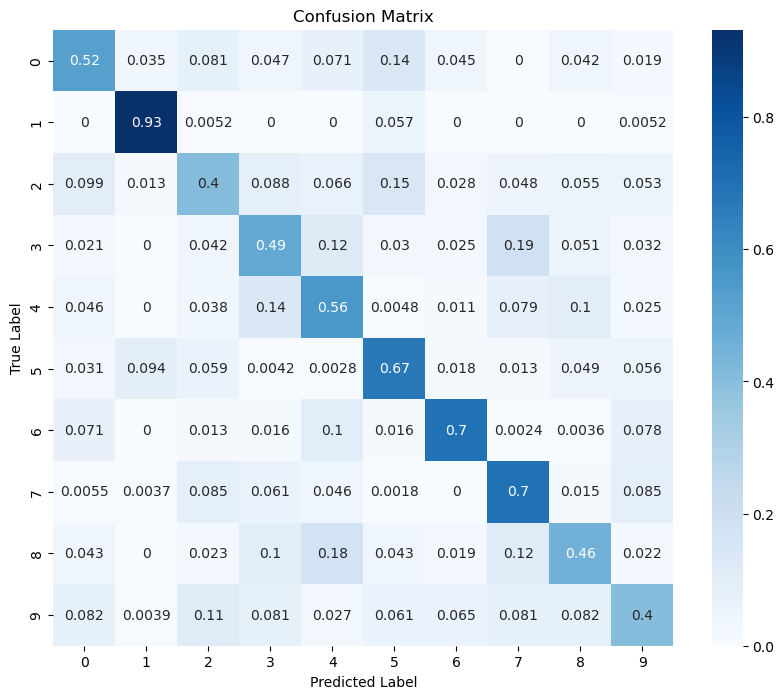

Test Accuracy: 65.07%
Learning rate: 0.0001, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.7606, Train Accuracy: 39.00%, Val Loss: 1.7874, Val Accuracy: 35.03%
Epoch [2/60], Train Loss: 1.4269, Train Accuracy: 48.57%, Val Loss: 1.7255, Val Accuracy: 33.96%
Epoch [3/60], Train Loss: 1.2784, Train Accuracy: 53.67%, Val Loss: 1.3160, Val Accuracy: 48.13%
Epoch [4/60], Train Loss: 1.1698, Train Accuracy: 56.24%, Val Loss: 1.3129, Val Accuracy: 49.47%
Epoch [5/60], Train Loss: 1.0518, Train Accuracy: 62.49%, Val Loss: 1.4355, Val Accuracy: 49.20%
Epoch [6/60], Train Loss: 0.9495, Train Accuracy: 65.52%, Val Loss: 1.2252, Val Accuracy: 58.82%
Epoch [7/60], Train Loss: 0.7754, Train Accuracy: 73.25%, Val Loss: 1.2675, Val Accuracy: 60.43%
Epoch [8/60], Train Loss: 0.6281, Train Accuracy: 78.58%, Val Loss: 1.4295, Val Accuracy: 55.35%
Epoch [9/60], Train Loss: 0.5436, Train Accuracy: 81.62%, Val Loss: 1.1531, Val Accuracy: 64.44%
Epoch [10/60], Train Loss: 0.3357, Train Accuracy: 89.

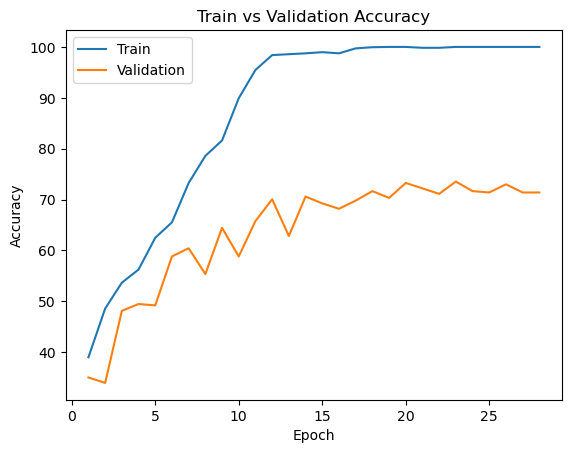

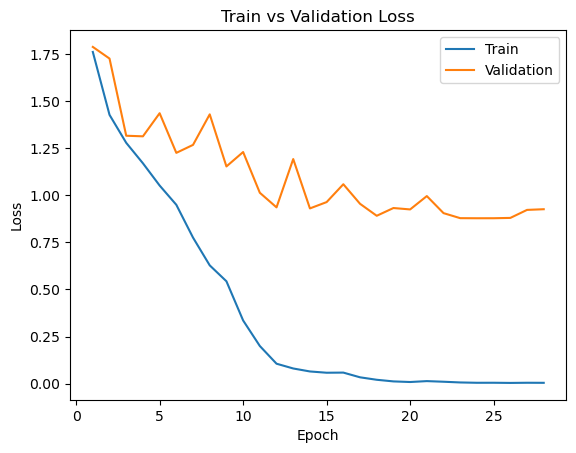

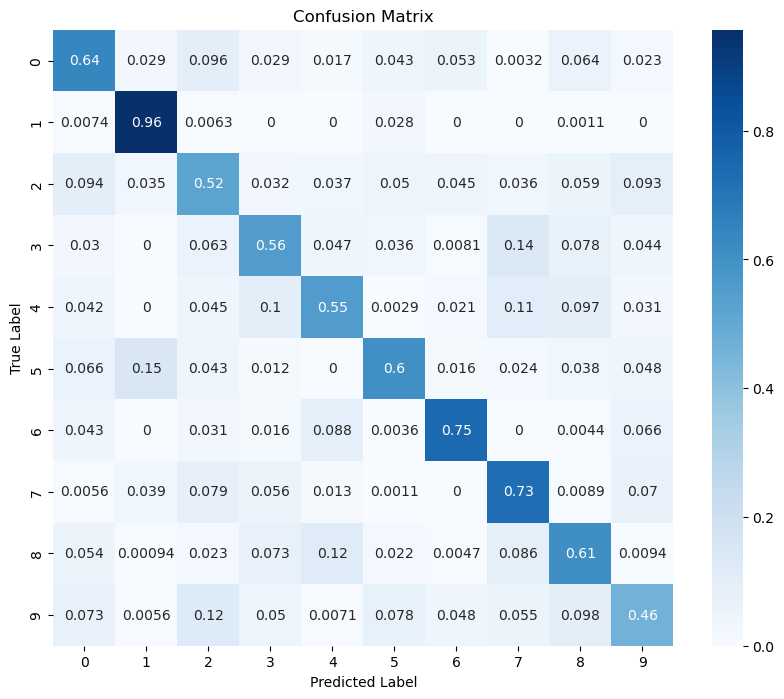

Test Accuracy: 75.47%
Learning rate: 0.0002, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.7722, Train Accuracy: 35.34%, Val Loss: 1.6607, Val Accuracy: 38.77%
Epoch [2/60], Train Loss: 1.5295, Train Accuracy: 44.22%, Val Loss: 2.1381, Val Accuracy: 25.94%
Epoch [3/60], Train Loss: 1.4329, Train Accuracy: 48.63%, Val Loss: 1.4039, Val Accuracy: 47.33%
Epoch [4/60], Train Loss: 1.3324, Train Accuracy: 51.20%, Val Loss: 1.3950, Val Accuracy: 48.66%
Epoch [5/60], Train Loss: 1.2517, Train Accuracy: 54.87%, Val Loss: 1.3179, Val Accuracy: 50.53%
Epoch [6/60], Train Loss: 1.1267, Train Accuracy: 57.73%, Val Loss: 1.3080, Val Accuracy: 54.81%
Epoch [7/60], Train Loss: 1.0187, Train Accuracy: 64.38%, Val Loss: 1.2106, Val Accuracy: 54.81%
Epoch [8/60], Train Loss: 0.9380, Train Accuracy: 66.67%, Val Loss: 1.5269, Val Accuracy: 48.66%
Epoch [9/60], Train Loss: 0.8216, Train Accuracy: 70.45%, Val Loss: 1.2432, Val Accuracy: 58.56%
Epoch [10/60], Train Loss: 0.7184, Train Accuracy: 74.

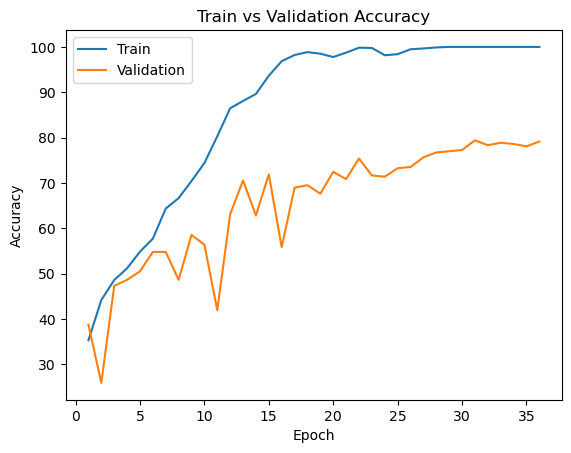

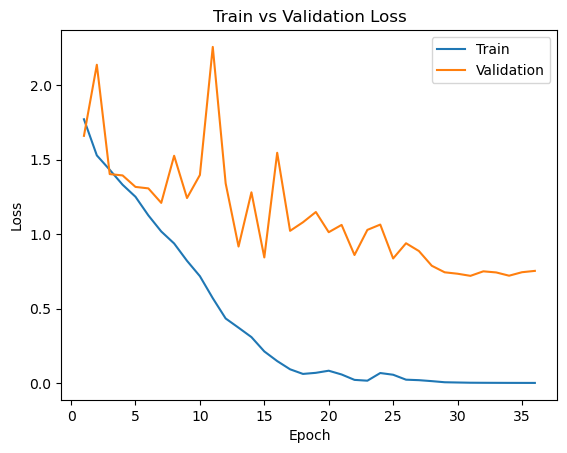

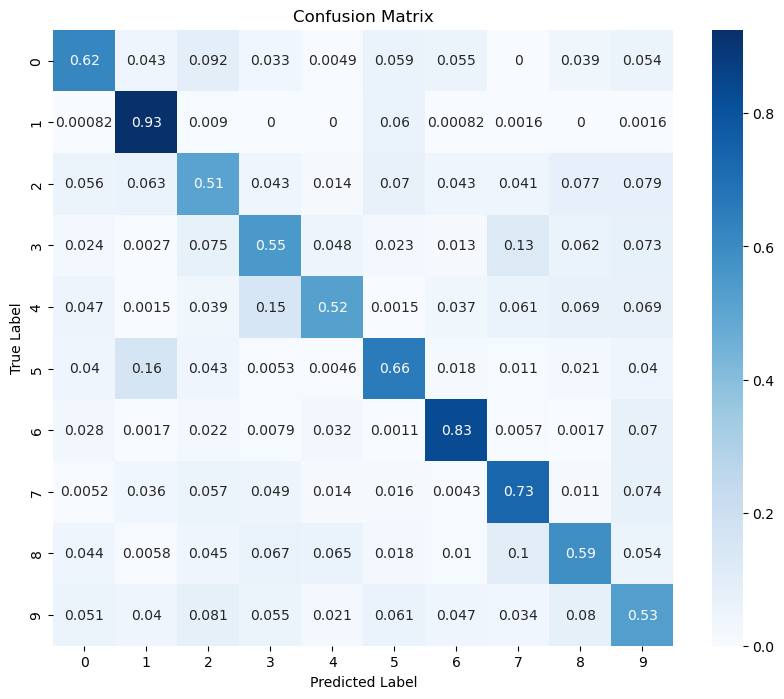

Test Accuracy: 77.60%
Learning rate: 0.0003, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.7749, Train Accuracy: 35.51%, Val Loss: 1.8904, Val Accuracy: 31.82%
Epoch [2/60], Train Loss: 1.6000, Train Accuracy: 41.47%, Val Loss: 1.7273, Val Accuracy: 40.11%
Epoch [3/60], Train Loss: 1.4834, Train Accuracy: 45.30%, Val Loss: 2.0182, Val Accuracy: 26.20%
Epoch [4/60], Train Loss: 1.4223, Train Accuracy: 47.31%, Val Loss: 1.6807, Val Accuracy: 43.58%
Epoch [5/60], Train Loss: 1.3283, Train Accuracy: 50.11%, Val Loss: 1.4979, Val Accuracy: 45.45%
Epoch [6/60], Train Loss: 1.2621, Train Accuracy: 53.21%, Val Loss: 1.8742, Val Accuracy: 35.56%
Epoch [7/60], Train Loss: 1.2155, Train Accuracy: 54.64%, Val Loss: 1.8747, Val Accuracy: 40.11%
Epoch [8/60], Train Loss: 1.1602, Train Accuracy: 56.99%, Val Loss: 1.4821, Val Accuracy: 52.14%
Epoch [9/60], Train Loss: 1.0468, Train Accuracy: 61.63%, Val Loss: 1.3580, Val Accuracy: 51.34%
Epoch [10/60], Train Loss: 0.9736, Train Accuracy: 64.

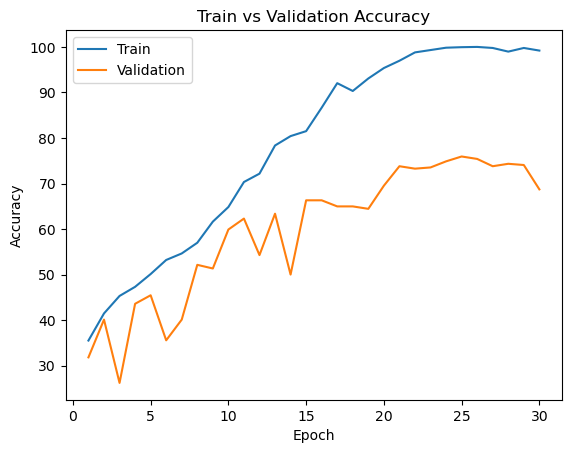

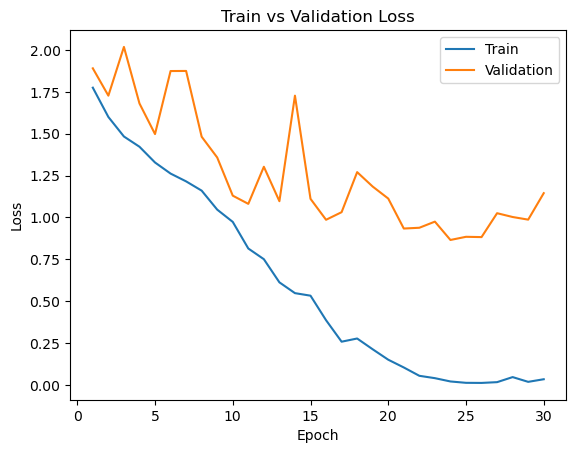

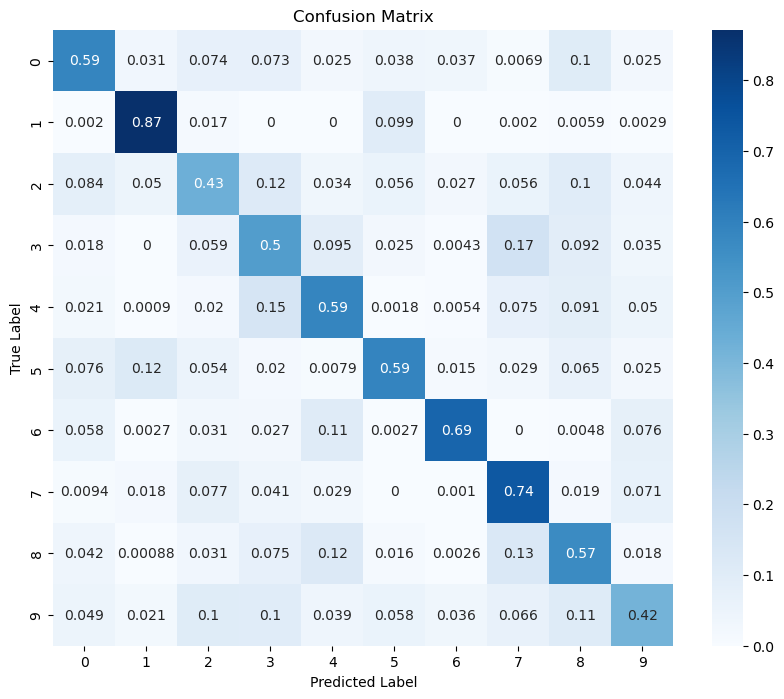

Test Accuracy: 78.13%
Learning rate: 0.0005, Subset size: 10, Gamma: 0.8
Epoch [1/60], Train Loss: 1.8101, Train Accuracy: 35.51%, Val Loss: 2.7455, Val Accuracy: 22.99%
Epoch [2/60], Train Loss: 1.6242, Train Accuracy: 39.40%, Val Loss: 1.7738, Val Accuracy: 37.43%
Epoch [3/60], Train Loss: 1.5467, Train Accuracy: 45.53%, Val Loss: 2.6793, Val Accuracy: 28.34%
Epoch [4/60], Train Loss: 1.4869, Train Accuracy: 46.05%, Val Loss: 2.5999, Val Accuracy: 23.53%
Epoch [5/60], Train Loss: 1.4101, Train Accuracy: 49.43%, Val Loss: 2.0144, Val Accuracy: 31.02%
Epoch [6/60], Train Loss: 1.3766, Train Accuracy: 49.83%, Val Loss: 1.6342, Val Accuracy: 38.77%
Epoch [7/60], Train Loss: 1.3487, Train Accuracy: 51.20%, Val Loss: 3.3232, Val Accuracy: 19.79%
Epoch [8/60], Train Loss: 1.2886, Train Accuracy: 53.72%, Val Loss: 2.0621, Val Accuracy: 30.48%
Epoch [9/60], Train Loss: 1.1971, Train Accuracy: 56.82%, Val Loss: 1.3318, Val Accuracy: 51.60%
Epoch [10/60], Train Loss: 1.1483, Train Accuracy: 56.

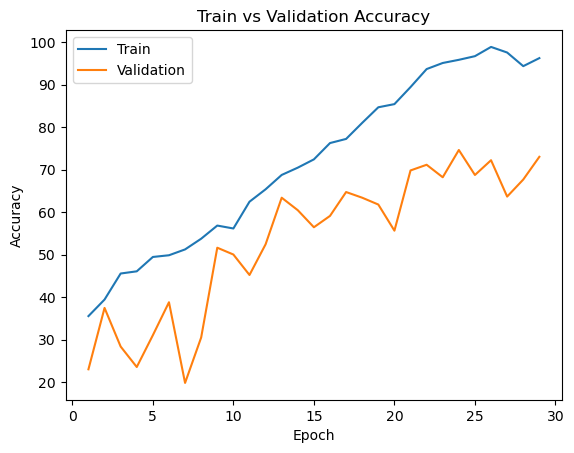

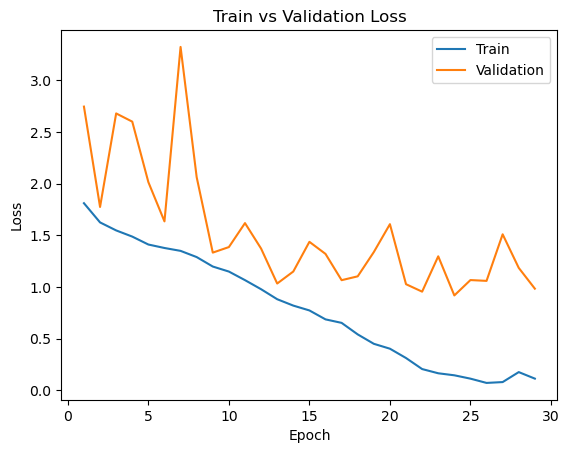

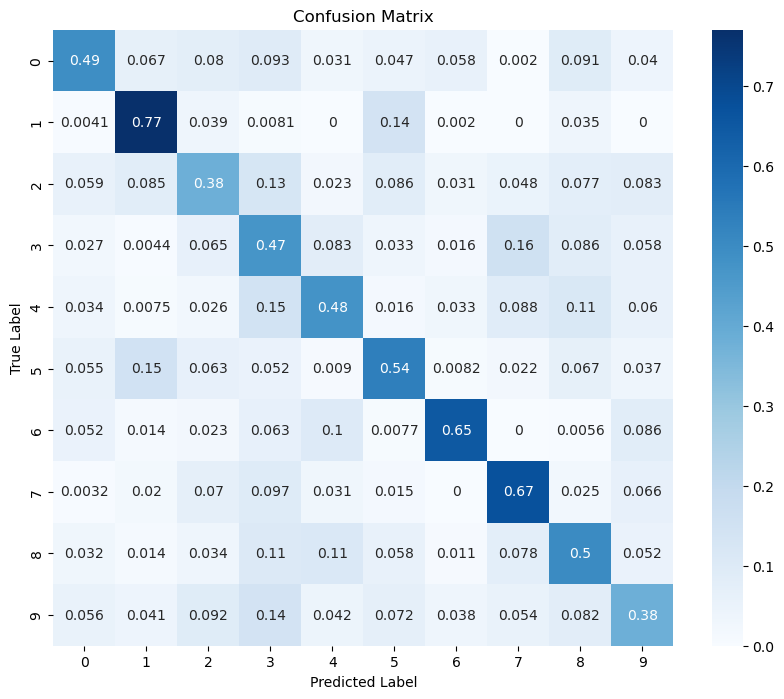

Test Accuracy: 73.33%


In [32]:
root_dir = "."
mfcc_data_dir = os.path.join(root_dir, "datasources", "mfcc")
mfcc_data_handler = DataHandler(mfcc_data_dir, batch_size=32, num_workers=4)
for ss, g in [(10, 0.8)]:
    for lr in [5e-5, 1e-4, 2e-4, 3e-4, 5e-4]:
        num_epochs = 60
        mfcc_cnn = MFCC_Resnet_not_pretrained()
        print(f"Learning rate: {lr}, Subset size: {ss}, Gamma: {g}")
        best_epoch = training.train(mfcc_cnn, mfcc_data_handler.train_loader, mfcc_data_handler.val_loader, num_epochs, lr, 32, ss, g, patience=5)
        model_path = training.get_model_name(mfcc_cnn.name, 32, lr, best_epoch)
        %matplotlib inline
        plot.plot_training_curve(model_path)
        plot.plot_confusion_matrix(model_path, range(10))
        # test the model
        test_data = mfcc_data_handler.test_loader
        mfcc_cnn.load_state_dict(torch.load(f"./models/{model_path}.pt"))
        training.test_model(mfcc_cnn, test_data)